In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import itertools
import warnings
warnings.simplefilter("ignore")
import time

In [2]:
data_org=pd.read_csv("Part- 1,2&3 - Signal.csv")

In [3]:
data_org.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [4]:
data_org.describe().T

count       mean        std      min      25%       50%  \
Parameter 1      1599.0   8.319637   1.741096  4.60000   7.1000   7.90000   
Parameter 2      1599.0   0.527821   0.179060  0.12000   0.3900   0.52000   
Parameter 3      1599.0   0.270976   0.194801  0.00000   0.0900   0.26000   
Parameter 4      1599.0   2.538806   1.409928  0.90000   1.9000   2.20000   
Parameter 5      1599.0   0.087467   0.047065  0.01200   0.0700   0.07900   
Parameter 6      1599.0  15.874922  10.460157  1.00000   7.0000  14.00000   
Parameter 7      1599.0  46.467792  32.895324  6.00000  22.0000  38.00000   
Parameter 8      1599.0   0.996747   0.001887  0.99007   0.9956   0.99675   
Parameter 9      1599.0   3.311113   0.154386  2.74000   3.2100   3.31000   
Parameter 10     1599.0   0.658149   0.169507  0.33000   0.5500   0.62000   
Parameter 11     1599.0  10.422983   1.065668  8.40000   9.5000  10.20000   
Signal_Strength  1599.0   5.636023   0.807569  3.00000   5.0000   6.00000   

                       75%        max  
Parameter 1       9.200000   15.90000  
Parameter 2       0.640000    1.58000  
Parameter 3       0.420000    1.00000  
Parameter 4       2.600000   15.50000  
Parameter 5       0.090000    0.61100  
Parameter 6      21.000000   72.00000  
Parameter 7      62.000000  289.00000  
Parameter 8       0.997835    1.00369  
Parameter 9       3.400000    4.01000  
Parameter 10      0.730000    2.00000  
Parameter 11     11.100000   14.90000  
Signal_Strength   6.000000    8.00000

In [5]:
data_org.shape

(1599, 12)

In [6]:
data=data_org

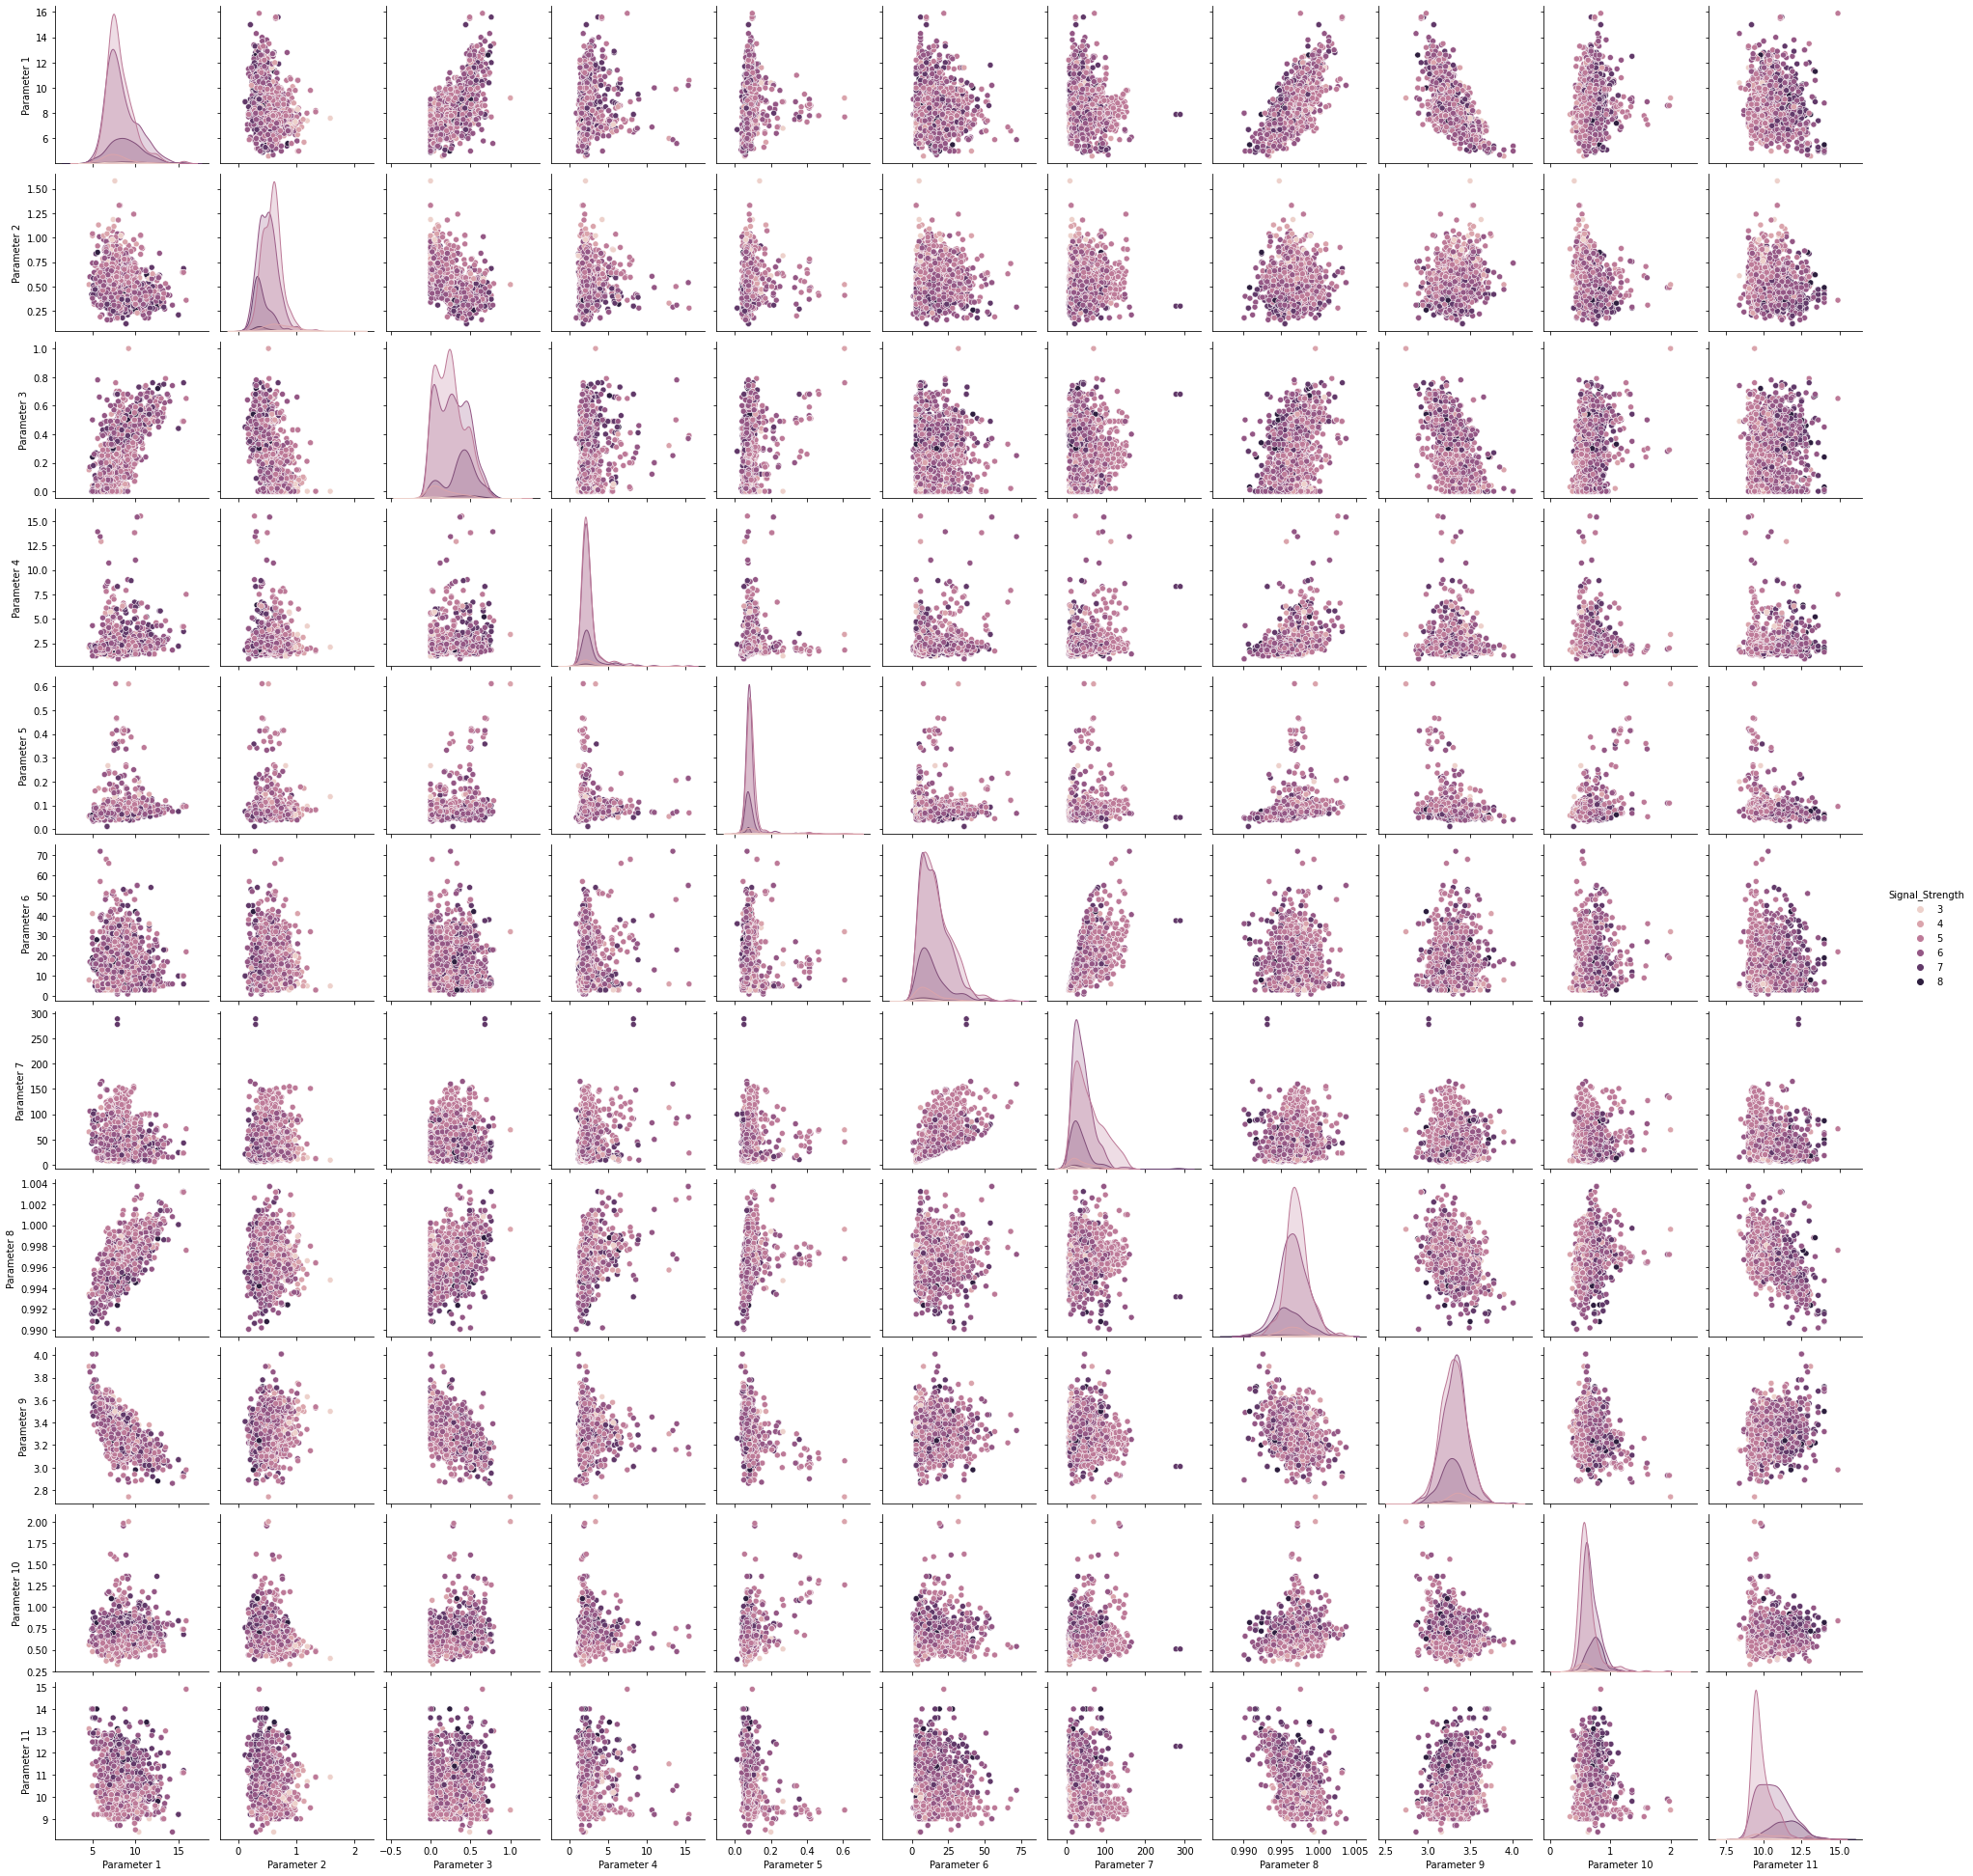

In [7]:

sns.pairplot(data,hue="Signal_Strength")

<AxesSubplot:>

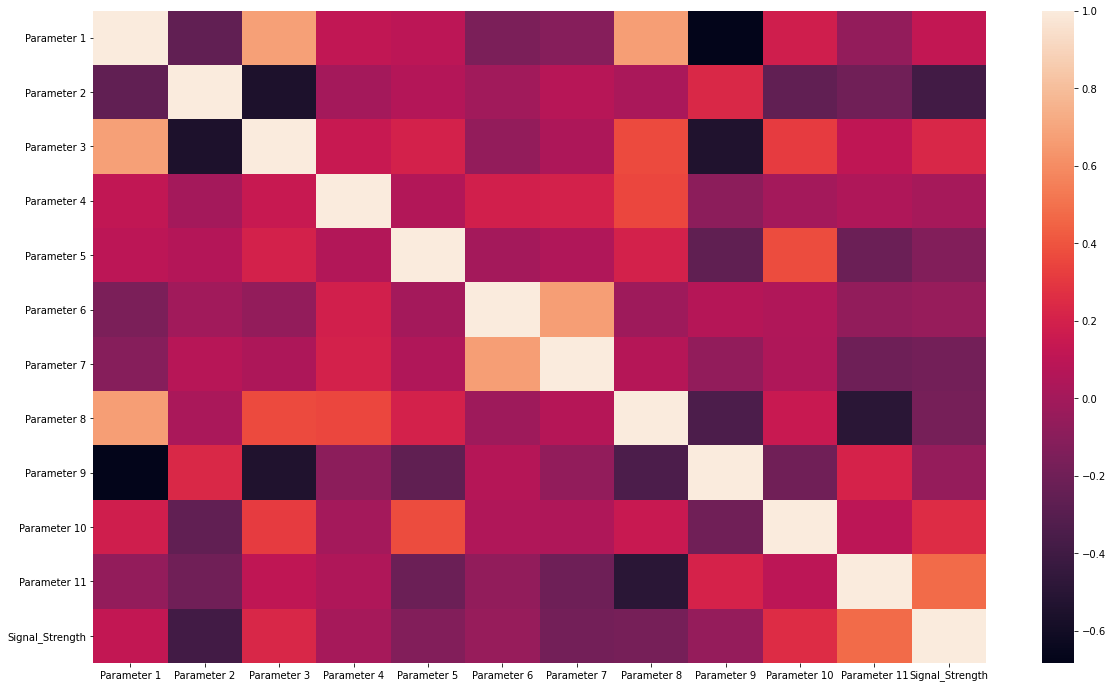

In [8]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr())

<AxesSubplot:>

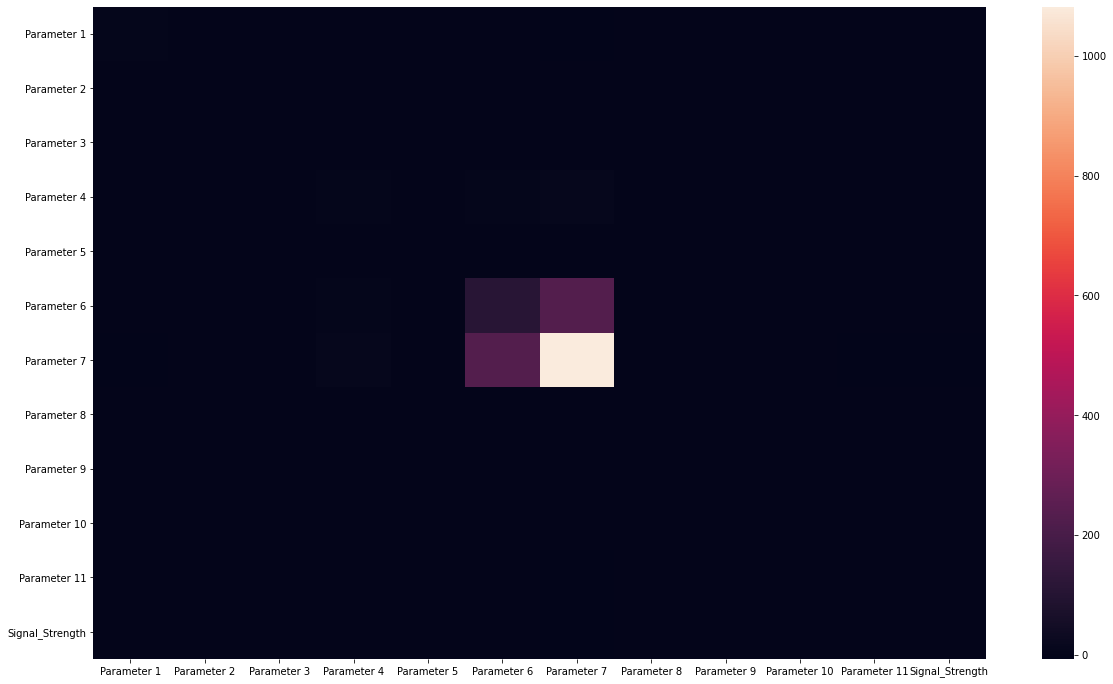

In [9]:
plt.figure(figsize=(20,12))
sns.heatmap(data.cov())

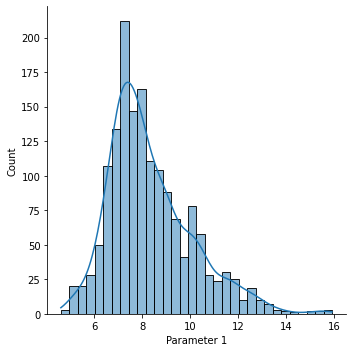

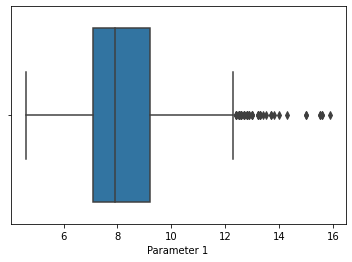

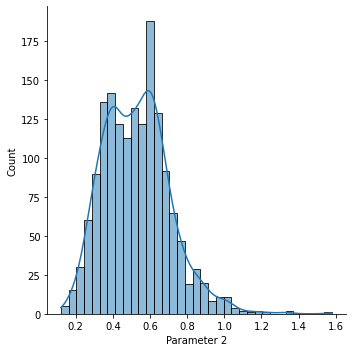

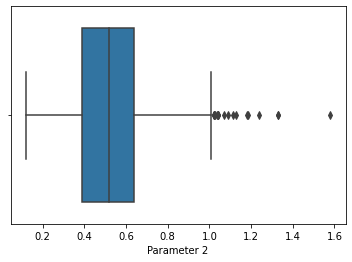

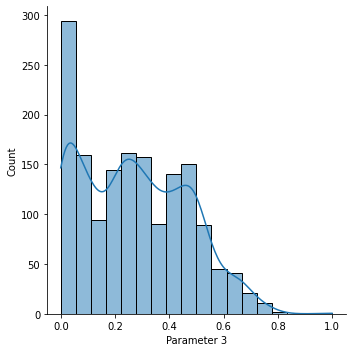

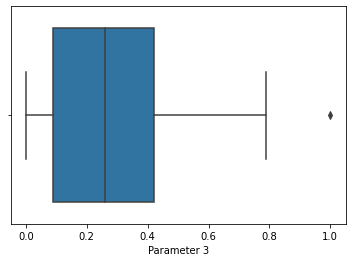

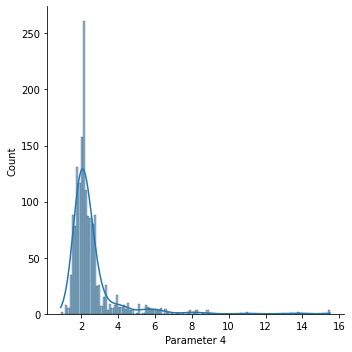

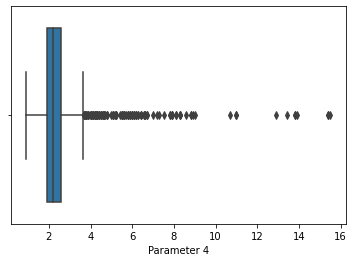

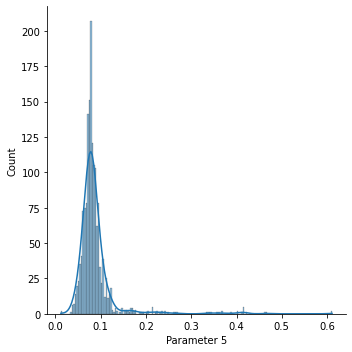

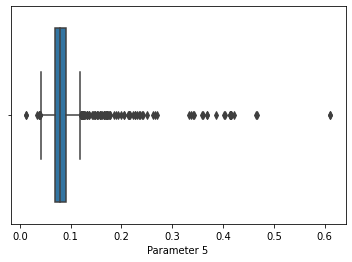

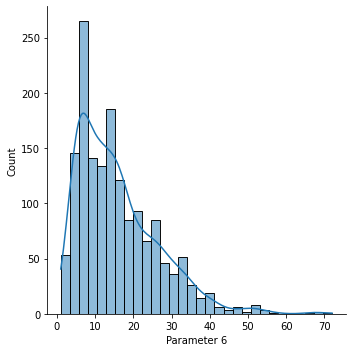

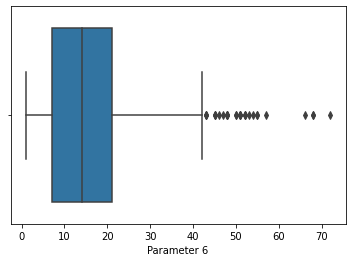

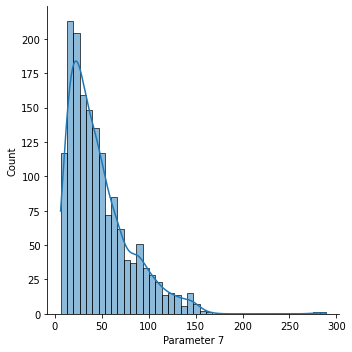

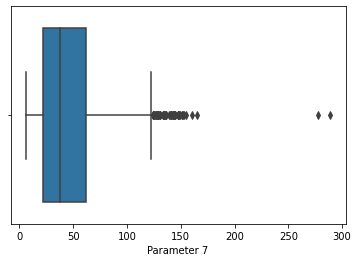

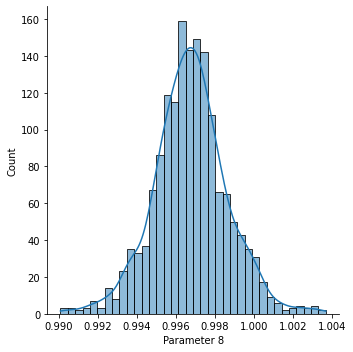

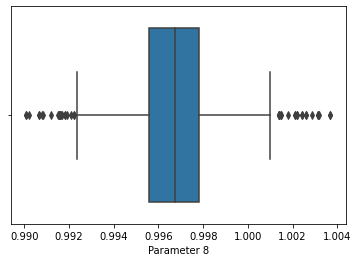

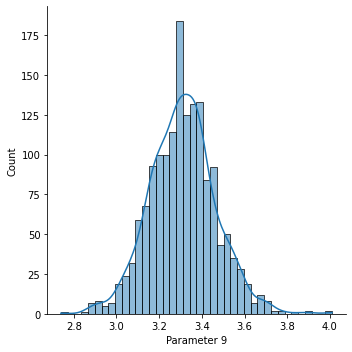

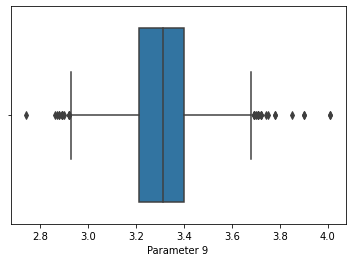

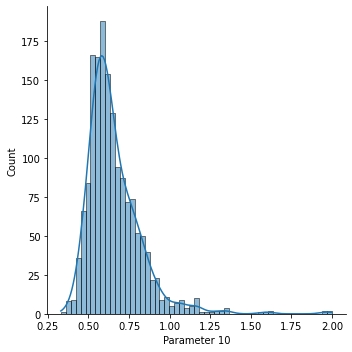

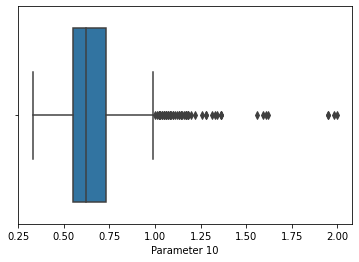

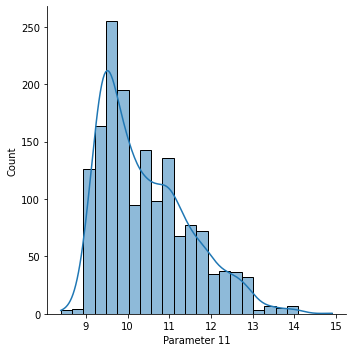

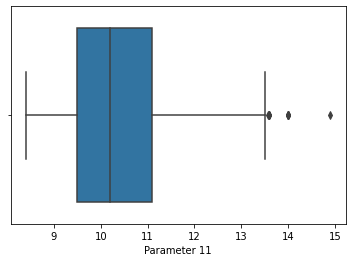

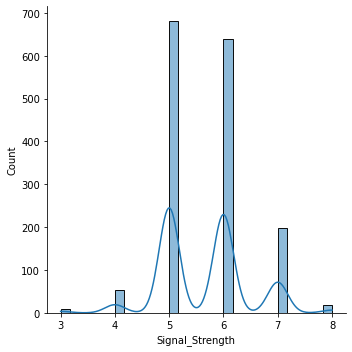

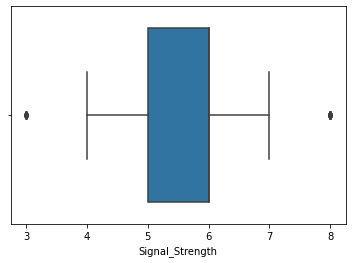

In [10]:
for each in data.columns:
    #plt.subplot(1,2,1)
    sns.displot(data=data[each],kde=True)
    plt.show()
    #plt.subplot(1,2,2)
    sns.boxplot(x=data[each])
    plt.show()
    plt.close()

In [11]:
data.dtypes


Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

Considering the parameters that are detected as outliers as simply the overdrives of the circuits given so that they are driven into some kind of resonance, we can replace them to understand and substitute for those outliers with the Quartiles.

In [12]:
data_org.describe()


Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.319637     0.527821     0.270976     2.538806     0.087467   
std       1.741096     0.179060     0.194801     1.409928     0.047065   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1599.000000  1599.000000  1599.000000  1599.000000   1599.000000   
mean     15.874922    46.467792     0.996747     3.311113      0.658149   
std      10.460157    32.895324     0.001887     0.154386      0.169507   
min       1.000000     6.000000     0.990070     2.740000      0.330000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996750     3.310000      0.620000   
75%      21.000000    62.000000     0.997835     3.400000      0.730000   
max      72.000000   289.000000     1.003690     4.010000      2.000000   

       Parameter 11  Signal_Strength  
count   1599.000000      1599.000000  
mean      10.422983         5.636023  
std        1.065668         0.807569  
min        8.400000         3.000000  
25%        9.500000         5.000000  
50%       10.200000         6.000000  
75%       11.100000         6.000000  
max       14.900000         8.000000

In [13]:
###############################################################
#
###############################################################

def outlier_elimination(dataframe_given):
    dataframe=dataframe_given.copy()
    cols=dataframe.columns
    #######################################
    for col in cols:
        data=dataframe[col]
        maxpoint=dataframe.describe()[col]["max"]
        minpoint=dataframe.describe()[col]["min"]
        Q1=dataframe.describe()[col]["25%"]
        Q3=dataframe.describe()[col]["75%"]
        data[data<Q1]=Q1
        data[data>Q3]=Q3
    #####################################
    return dataframe
###############################################################
#
###############################################################        
data=outlier_elimination(data_org.drop("Signal_Strength",axis=1))
data["Signal_Strength"]=data_org["Signal_Strength"]

In [14]:
data.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.077486     0.516413     0.257455     2.227423     0.079728   
std       0.857963     0.102133     0.133717     0.285008     0.008013   
min       7.100000     0.390000     0.090000     1.900000     0.070000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max       9.200000     0.640000     0.420000     2.600000     0.090000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1599.000000  1599.000000  1599.000000  1599.000000   1599.000000   
mean     13.881176    40.362101     0.996719     3.307223      0.633189   
std       5.641092    16.311374     0.000902     0.077528      0.072774   
min       7.000000    22.000000     0.995600     3.210000      0.550000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996750     3.310000      0.620000   
75%      21.000000    62.000000     0.997833     3.400000      0.730000   
max      21.000000    62.000000     0.997835     3.400000      0.730000   

       Parameter 11  Signal_Strength  
count   1599.000000      1599.000000  
mean      10.260851         5.636023  
std        0.657560         0.807569  
min        9.500000         3.000000  
25%        9.500000         5.000000  
50%       10.200000         6.000000  
75%       11.100000         6.000000  
max       11.100000         8.000000

<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

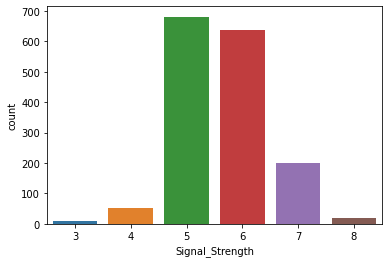

In [15]:
sns.countplot(x=data["Signal_Strength"])

In [16]:
data["Signal_Strength"]=data["Signal_Strength"].astype("category")

In [17]:
data.dtypes

Parameter 1         float64
Parameter 2         float64
Parameter 3         float64
Parameter 4         float64
Parameter 5         float64
Parameter 6         float64
Parameter 7         float64
Parameter 8         float64
Parameter 9         float64
Parameter 10        float64
Parameter 11        float64
Signal_Strength    category
dtype: object

<AxesSubplot:xlabel='Parameter 1', ylabel='Signal_Strength'>

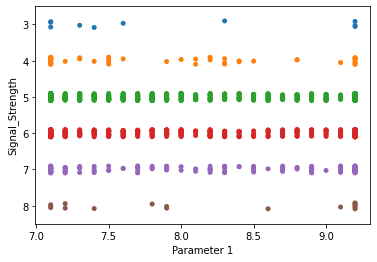

In [18]:
sns.stripplot(data=data,x="Parameter 1",y="Signal_Strength")

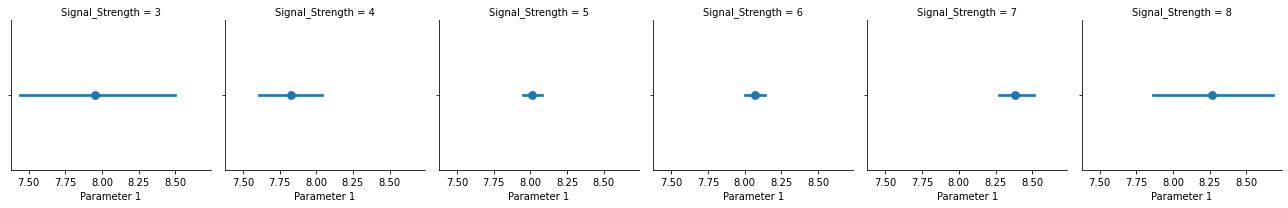

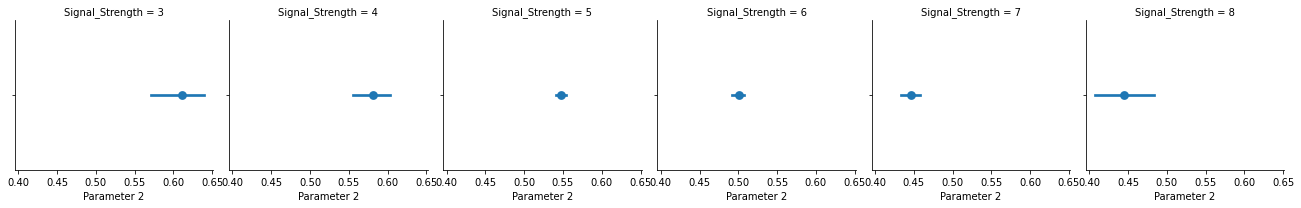

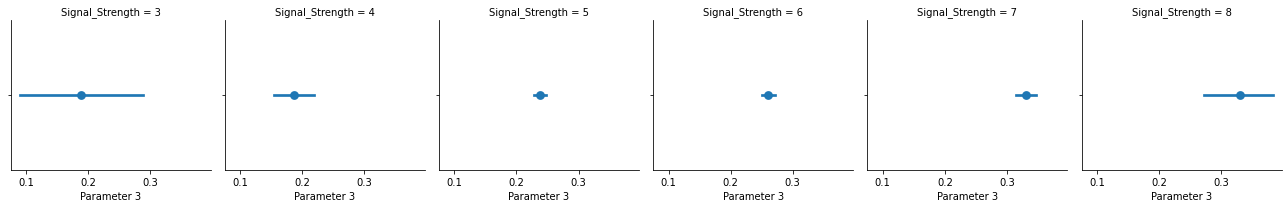

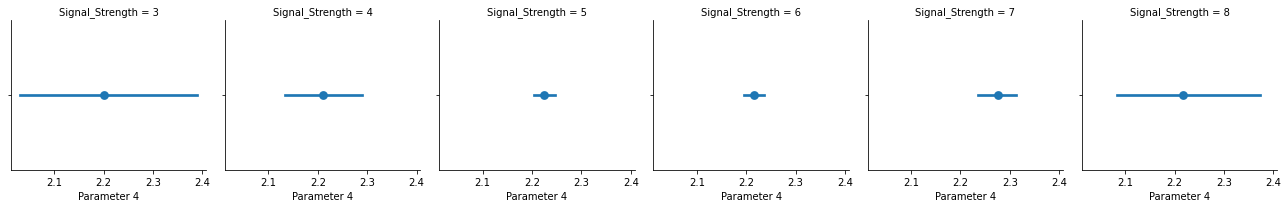

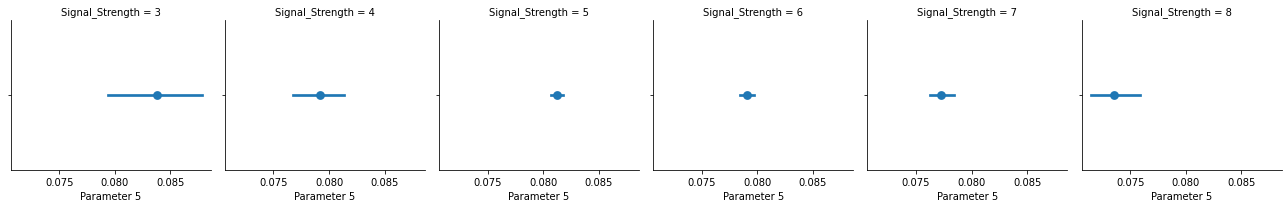

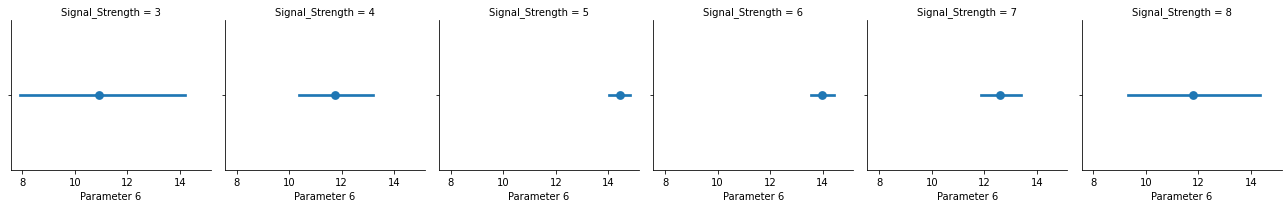

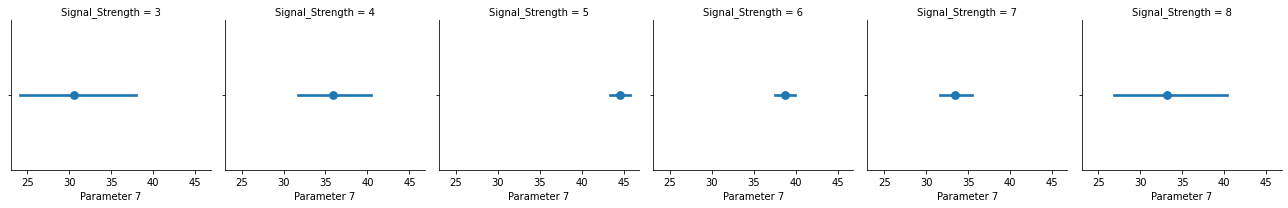

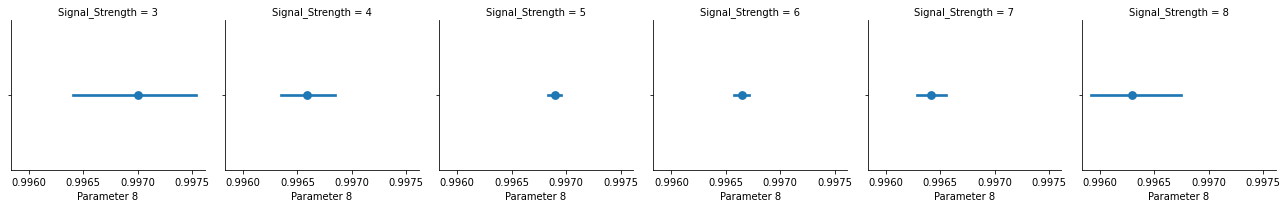

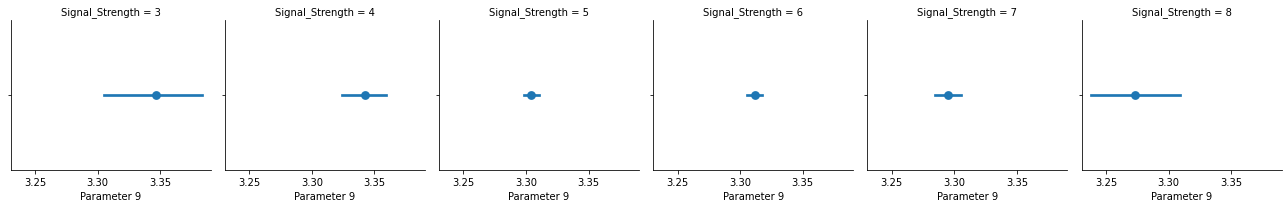

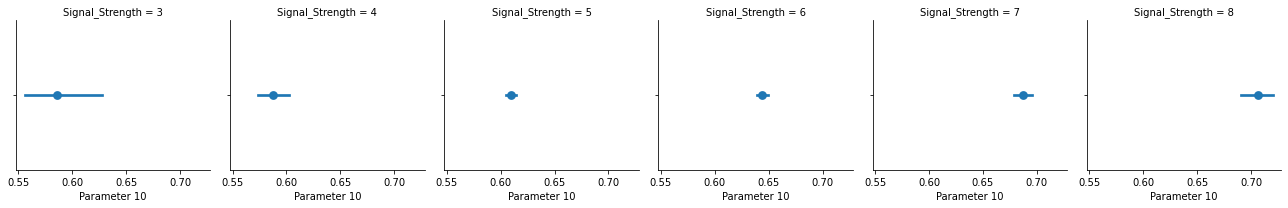

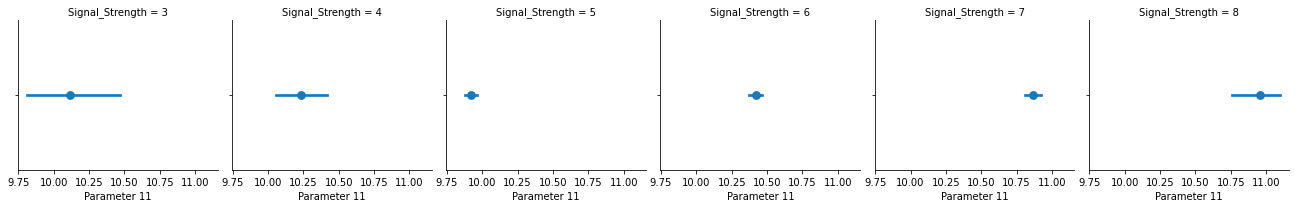

In [19]:
for each in data.columns.drop("Signal_Strength"):
    grid=sns.FacetGrid(data, col="Signal_Strength")
    grid.map(sns.pointplot,each)
    #grid.add_legend()

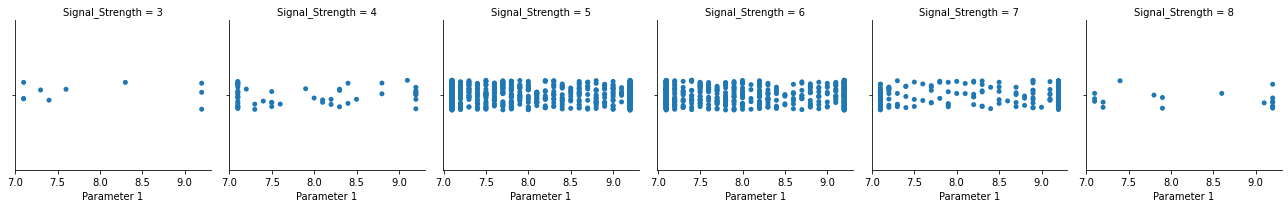

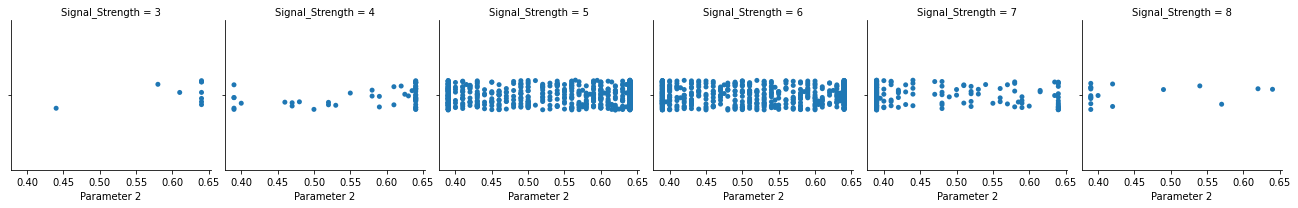

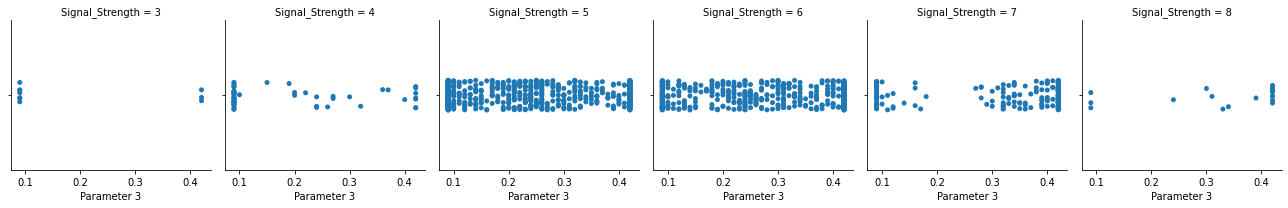

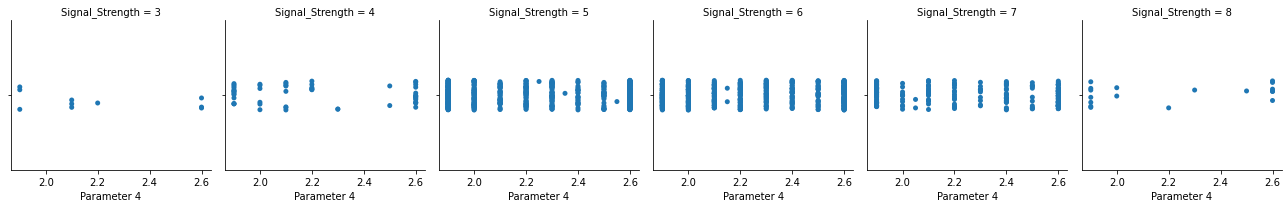

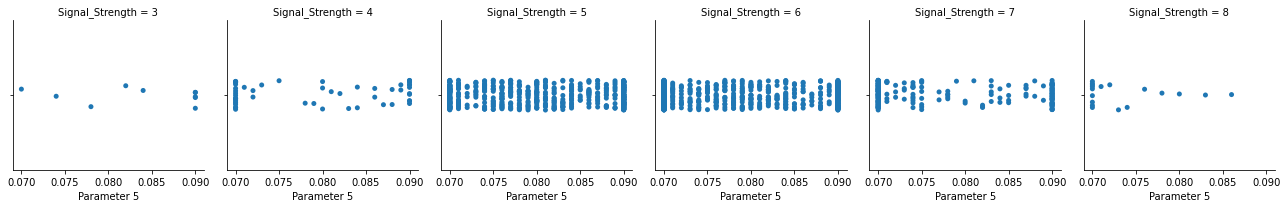

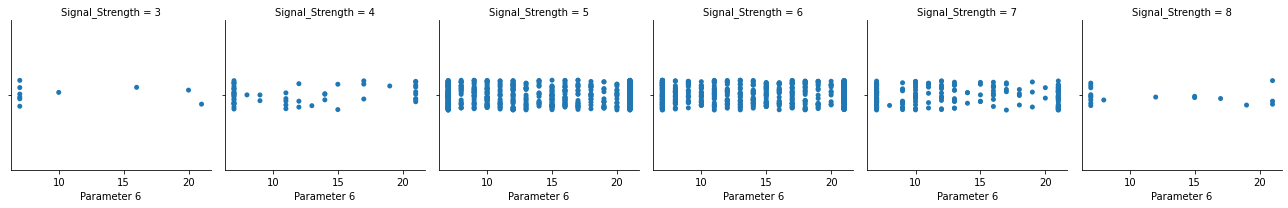

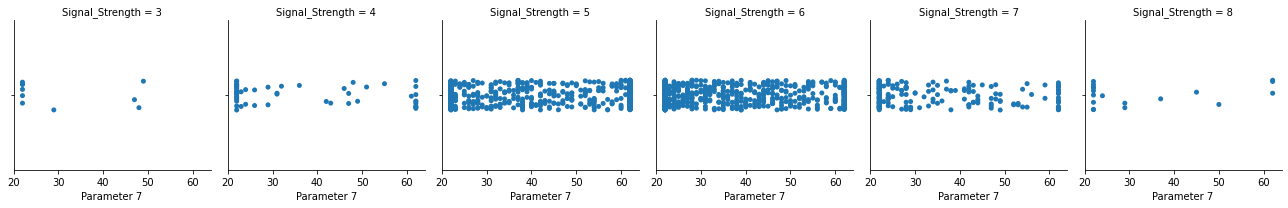

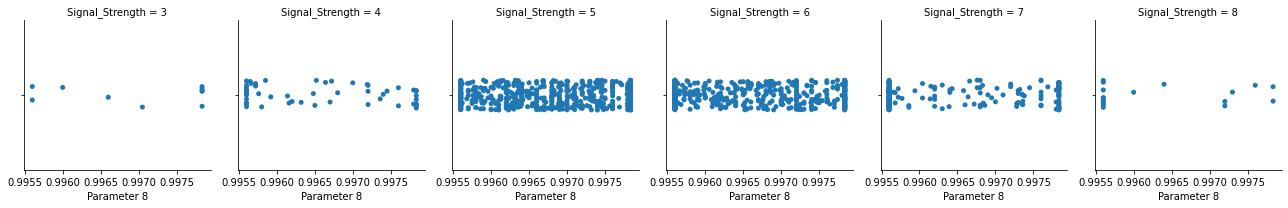

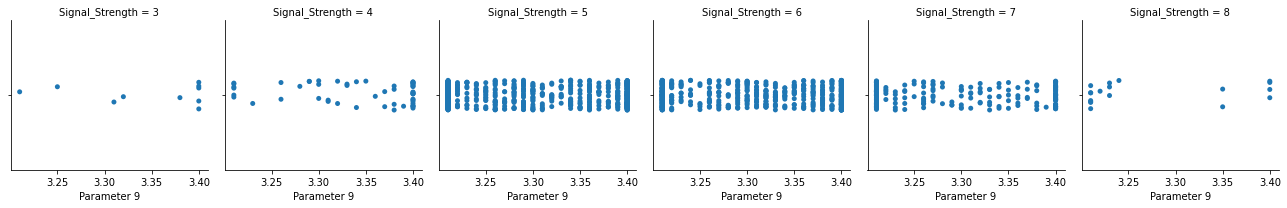

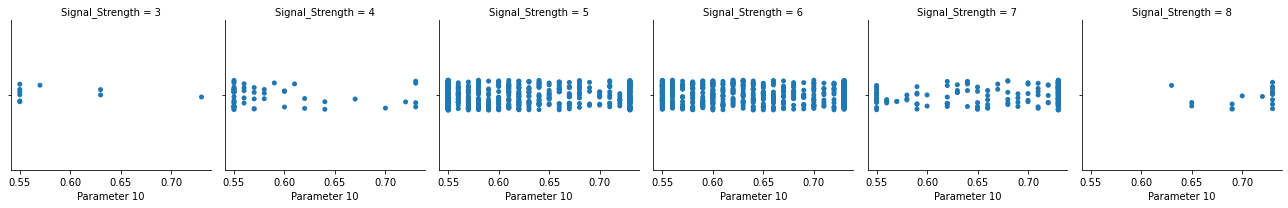

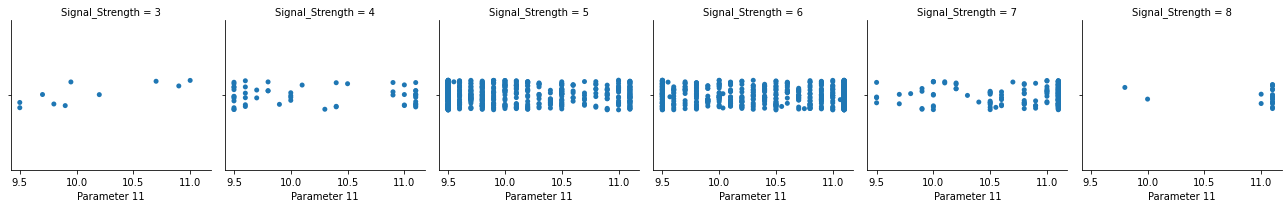

In [20]:
for each in data.columns.drop("Signal_Strength"):
    grid=sns.FacetGrid(data, col="Signal_Strength")
    grid.map(sns.stripplot,each)
    #grid.add_legend()

Looks like there is some particular orientations within the parameters that tend to go more towards right for higher qualtiy signals, on an average, and towards to the left for lower quality signals. The points, along with their mean points seem to be particularly oriented thus. We need to check it out by groupings.


In [21]:
data_groups=data.groupby("Signal_Strength")

In [22]:
data_groups.groups

{3: [459, 517, 690, 832, 899, 1299, 1374, 1469, 1478, 1505], 4: [18, 38, 41, 45, 73, 79, 94, 151, 161, 167, 170, 199, 224, 261, 266, 409, 573, 576, 600, 633, 647, 659, 703, 704, 724, 813, 830, 833, 872, 876, 927, 937, 1124, 1176, 1189, 1233, 1235, 1238, 1239, 1261, 1263, 1276, 1293, 1307, 1363, 1369, 1423, 1461, 1467, 1480, 1482, 1484, 1521], 5: [0, 1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 17, 21, 22, 23, 25, 26, 27, 28, 30, 32, 34, 39, 40, 43, 44, 46, 47, 48, 49, 50, 53, 55, 56, 57, 58, 60, 61, 63, 64, 65, 66, 67, 68, 71, 72, 74, 75, 76, 78, 80, 81, 82, 83, 85, 87, 88, 89, 90, 92, 93, 96, 97, 98, 103, 104, 105, 106, 107, 109, 110, 111, 112, 114, 120, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 135, 136, 137, 138, 139, 140, 141, 143, 145, 146, 147, 152, 153, ...], 6: [3, 19, 20, 24, 29, 31, 33, 35, 36, 42, 51, 52, 54, 59, 69, 70, 77, 84, 86, 91, 95, 99, 100, 101, 102, 108, 113, 115, 116, 117, 118, 119, 121, 133, 134, 142, 144, 148, 149, 150, 159, 162, 168, 171, 172, 173, 177, 18

In [23]:
data_comparison_groups={}
for each in data_groups.groups:
    data_to={}
    temp=data_groups.get_group(each).describe().T
    #print(temp["mean"])
    data_to.update({'mean':temp["mean"],'std':temp["std"],'50%':temp["50%"]})
    data_comparison_groups.update({each:data_to})

In [24]:
data_comparison=pd.DataFrame(data_comparison_groups)

In [25]:
data_comparison.T

mean  \
3  Parameter 1      7.950000
Parameter 2      0.6...   
4  Parameter 1      7.828302
Parameter 2      0.5...   
5  Parameter 1      8.011013
Parameter 2      0.5...   
6  Parameter 1      8.069906
Parameter 2      0.5...   
7  Parameter 1      8.384925
Parameter 2      0.4...   
8  Parameter 1      8.266667
Parameter 2      0.4...   

                                                 std  \
3  Parameter 1      0.932440
Parameter 2      0.0...   
4  Parameter 1      0.803209
Parameter 2      0.0...   
5  Parameter 1      0.824984
Parameter 2      0.0...   
6  Parameter 1      0.872088
Parameter 2      0.0...   
7  Parameter 1      0.862211
Parameter 2      0.0...   
8  Parameter 1      0.923548
Parameter 2      0.0...   

                                                 50%  
3  Parameter 1      7.500000
Parameter 2      0.6...  
4  Parameter 1      7.5000
Parameter 2      0.640...  
5  Parameter 1      7.800
Parameter 2      0.580
...  
6  Parameter 1      7.90000
Parameter 2      0.49...  
7  Parameter 1      8.80000
Parameter 2      0.39...  
8  Parameter 1      8.2500
Parameter 2      0.390...

In [26]:
data_groups.groups

{3: [459, 517, 690, 832, 899, 1299, 1374, 1469, 1478, 1505], 4: [18, 38, 41, 45, 73, 79, 94, 151, 161, 167, 170, 199, 224, 261, 266, 409, 573, 576, 600, 633, 647, 659, 703, 704, 724, 813, 830, 833, 872, 876, 927, 937, 1124, 1176, 1189, 1233, 1235, 1238, 1239, 1261, 1263, 1276, 1293, 1307, 1363, 1369, 1423, 1461, 1467, 1480, 1482, 1484, 1521], 5: [0, 1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 17, 21, 22, 23, 25, 26, 27, 28, 30, 32, 34, 39, 40, 43, 44, 46, 47, 48, 49, 50, 53, 55, 56, 57, 58, 60, 61, 63, 64, 65, 66, 67, 68, 71, 72, 74, 75, 76, 78, 80, 81, 82, 83, 85, 87, 88, 89, 90, 92, 93, 96, 97, 98, 103, 104, 105, 106, 107, 109, 110, 111, 112, 114, 120, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 135, 136, 137, 138, 139, 140, 141, 143, 145, 146, 147, 152, 153, ...], 6: [3, 19, 20, 24, 29, 31, 33, 35, 36, 42, 51, 52, 54, 59, 69, 70, 77, 84, 86, 91, 95, 99, 100, 101, 102, 108, 113, 115, 116, 117, 118, 119, 121, 133, 134, 142, 144, 148, 149, 150, 159, 162, 168, 171, 172, 173, 177, 18

In [27]:
pd.DataFrame(data_comparison[3]["mean"])

mean
Parameter 1    7.950000
Parameter 2    0.611000
Parameter 3    0.189000
Parameter 4    2.200000
Parameter 5    0.083800
Parameter 6   10.900000
Parameter 7   30.500000
Parameter 8    0.997003
Parameter 9    3.347000
Parameter 10   0.586000
Parameter 11  10.115000

In [28]:
dataframe_taken={}
for cate in data_comparison.T.columns:
    temp=pd.DataFrame()
    temp2=pd.DataFrame()
    for each in data_groups.groups:
        print(cate,each)
        print(data_comparison[each][cate])
        #print(data_comparison[each][cate])
        temp[each]=data_comparison[each][cate]
        #temp
        #temp2[cate]=data_comparison[cate][each]
        #print(data_comparison[each][cate])
        print(temp[each])
        #print(temp2[cate])
        #print(each)
    print(" \ntoken end\n")
    dataframe_taken.update({cate : temp})
       

mean 3
Parameter 1      7.950000
Parameter 2      0.611000
Parameter 3      0.189000
Parameter 4      2.200000
Parameter 5      0.083800
Parameter 6     10.900000
Parameter 7     30.500000
Parameter 8      0.997003
Parameter 9      3.347000
Parameter 10     0.586000
Parameter 11    10.115000
Name: mean, dtype: float64
Parameter 1      7.950000
Parameter 2      0.611000
Parameter 3      0.189000
Parameter 4      2.200000
Parameter 5      0.083800
Parameter 6     10.900000
Parameter 7     30.500000
Parameter 8      0.997003
Parameter 9      3.347000
Parameter 10     0.586000
Parameter 11    10.115000
Name: 3, dtype: float64
mean 4
Parameter 1      7.828302
Parameter 2      0.581887
Parameter 3      0.186415
Parameter 4      2.211321
Parameter 5      0.079189
Parameter 6     11.735849
Parameter 7     35.943396
Parameter 8      0.996592
Parameter 9      3.342075
Parameter 10     0.587170
Parameter 11    10.232075
Name: mean, dtype: float64
Parameter 1      7.828302
Parameter 2      0.58188

In [29]:
dataframe_taken["std"] #Standard Deviations for varios parameters arranged according to the mean of the corresponding signal strength

3          4          5          6          7          8
Parameter 1    0.932440   0.803209   0.824984   0.872088   0.862211   0.923548
Parameter 2    0.063325   0.086632   0.095784   0.098658   0.086270   0.087058
Parameter 3    0.159405   0.126340   0.126095   0.135109   0.123907   0.123378
Parameter 4    0.294392   0.283291   0.290032   0.279508   0.280371   0.322217
Parameter 5    0.007569   0.008560   0.007699   0.007901   0.008376   0.005056
Parameter 6    5.801341   5.360651   5.641878   5.599191   5.469371   5.816362
Parameter 7   12.276898  16.300561  16.778541  15.353264  13.875599  15.667710
Parameter 8    0.000976   0.000894   0.000835   0.000923   0.000928   0.000908
Parameter 9    0.071032   0.066372   0.078013   0.077105   0.075971   0.081746
Parameter 10   0.060222   0.056513   0.067485   0.070017   0.061385   0.033255
Parameter 11   0.562756   0.667882   0.536666   0.633817   0.412148   0.386876

In [30]:
dataframe_taken["std"].T

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
3     0.932440     0.063325     0.159405     0.294392     0.007569   
4     0.803209     0.086632     0.126340     0.283291     0.008560   
5     0.824984     0.095784     0.126095     0.290032     0.007699   
6     0.872088     0.098658     0.135109     0.279508     0.007901   
7     0.862211     0.086270     0.123907     0.280371     0.008376   
8     0.923548     0.087058     0.123378     0.322217     0.005056   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
3     5.801341    12.276898     0.000976     0.071032      0.060222   
4     5.360651    16.300561     0.000894     0.066372      0.056513   
5     5.641878    16.778541     0.000835     0.078013      0.067485   
6     5.599191    15.353264     0.000923     0.077105      0.070017   
7     5.469371    13.875599     0.000928     0.075971      0.061385   
8     5.816362    15.667710     0.000908     0.081746      0.033255   

   Parameter 11  
3      0.562756  
4      0.667882  
5      0.536666  
6      0.633817  
7      0.412148  
8      0.386876

In [31]:
dataframe_taken["mean"].T

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
3     7.950000     0.611000     0.189000     2.200000     0.083800   
4     7.828302     0.581887     0.186415     2.211321     0.079189   
5     8.011013     0.547283     0.237269     2.225330     0.081222   
6     8.069906     0.500462     0.260940     2.216771     0.079052   
7     8.384925     0.446231     0.331055     2.275377     0.077286   
8     8.266667     0.444444     0.331111     2.216667     0.073500   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
3    10.900000    30.500000     0.997003     3.347000      0.586000   
4    11.735849    35.943396     0.996592     3.342075      0.587170   
5    14.430250    44.566814     0.996895     3.304258      0.609354   
6    13.973354    38.750784     0.996644     3.311614      0.644232   
7    12.618090    33.457286     0.996414     3.295075      0.687337   
8    11.777778    33.222222     0.996298     3.273333      0.706667   

   Parameter 11  
3     10.115000  
4     10.232075  
5      9.920485  
6     10.420455  
7     10.866080  
8     10.955556

In [32]:
dataframe_taken["50%"].T

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
3         7.50         0.64        0.090          2.1       0.0870   
4         7.50         0.64        0.090          2.1       0.0800   
5         7.80         0.58        0.230          2.2       0.0810   
6         7.90         0.49        0.260          2.2       0.0780   
7         8.80         0.39        0.400          2.3       0.0730   
8         8.25         0.39        0.405          2.1       0.0705   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
3          7.0         22.0     0.997443         3.39          0.55   
4         11.0         26.0     0.996500         3.37          0.56   
5         15.0         47.0     0.997000         3.30          0.58   
6         14.0         35.0     0.996560         3.32          0.64   
7         11.0         27.0     0.995770         3.28          0.73   
8          7.5         23.0     0.995600         3.23          0.73   

   Parameter 11  
3         9.925  
4        10.000  
5         9.700  
6        10.500  
7        11.100  
8        11.100

<function matplotlib.pyplot.show(close=None, block=None)>

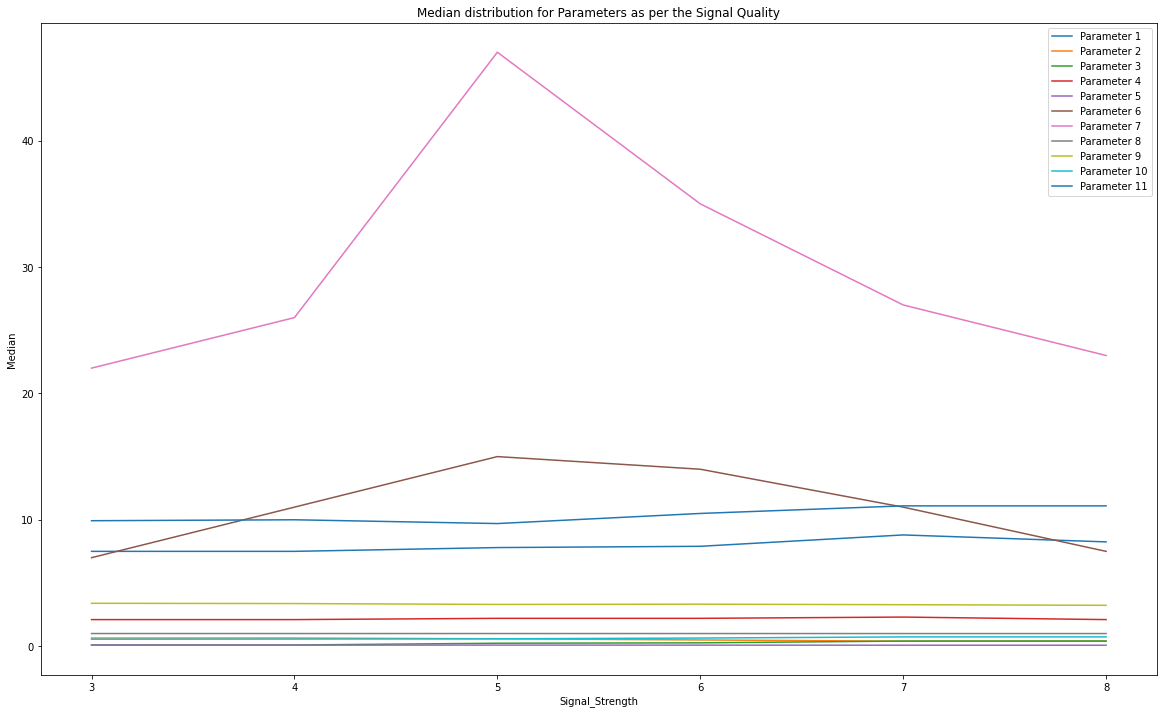

In [33]:
plt.figure(figsize=(20,12))
plt.title("Median distribution for Parameters as per the Signal Quality")
plt.xlabel("Signal_Strength")
plt.ylabel("Median")
plt.plot(dataframe_taken["50%"].T)
plt.legend(dataframe_taken["50%"].T.columns)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

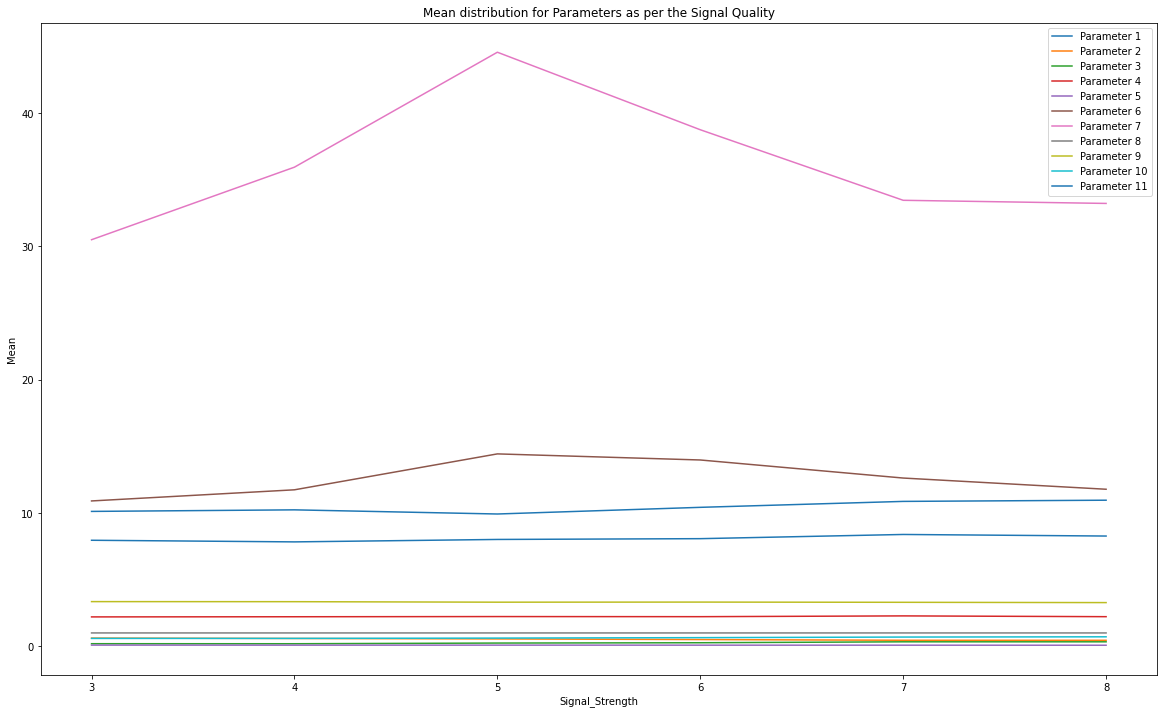

In [34]:
plt.figure(figsize=(20,12))
plt.title("Mean distribution for Parameters as per the Signal Quality")
plt.xlabel("Signal_Strength")
plt.ylabel("Mean")
plt.plot(dataframe_taken["mean"].T)
plt.legend(dataframe_taken["mean"].T.columns)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

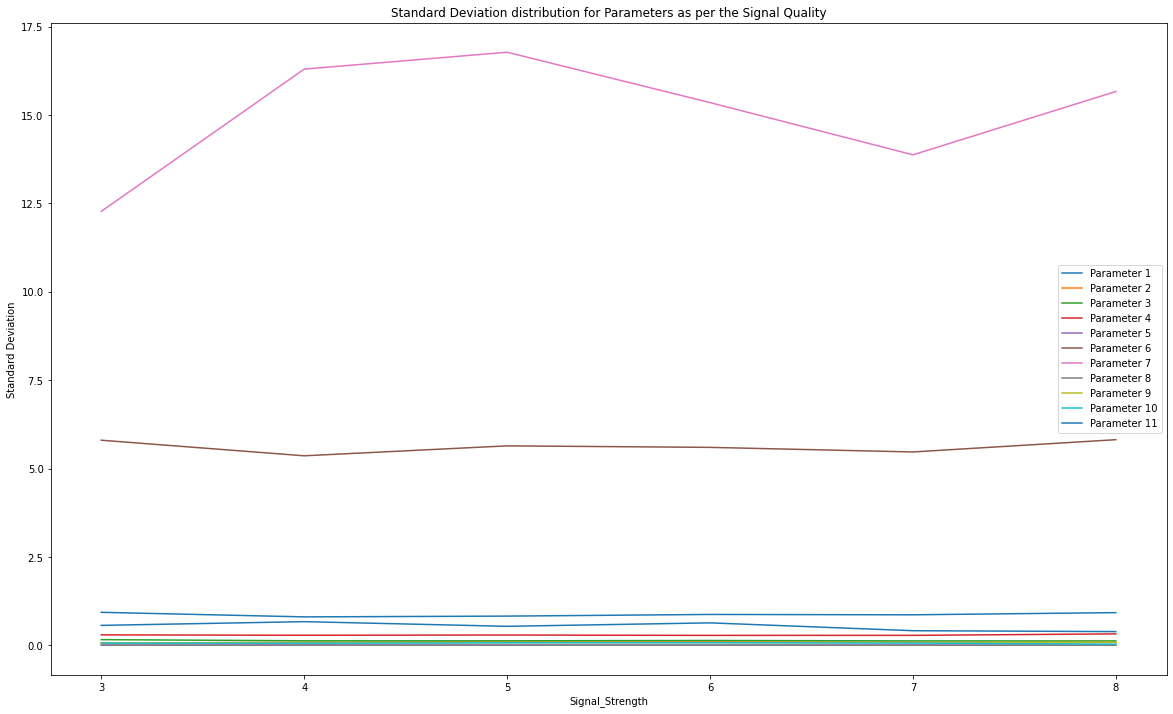

In [35]:
plt.figure(figsize=(20,12))
plt.title("Standard Deviation distribution for Parameters as per the Signal Quality")
plt.xlabel("Signal_Strength")
plt.ylabel("Standard Deviation")
plt.plot(dataframe_taken["std"].T)
plt.legend(dataframe_taken["std"].T.columns)
plt.show

In [36]:
data2=data.drop(["Signal_Strength"],axis=1)

In [37]:
data2.corr()[(data2.corr()>0.6) | (data2.corr()<-0.6)]

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
Parameter 1      1.000000          NaN     0.637751          NaN          NaN   
Parameter 2           NaN     1.000000    -0.639238          NaN          NaN   
Parameter 3      0.637751    -0.639238     1.000000          NaN          NaN   
Parameter 4           NaN          NaN          NaN          1.0          NaN   
Parameter 5           NaN          NaN          NaN          NaN          1.0   
Parameter 6           NaN          NaN          NaN          NaN          NaN   
Parameter 7           NaN          NaN          NaN          NaN          NaN   
Parameter 8           NaN          NaN          NaN          NaN          NaN   
Parameter 9     -0.655172          NaN          NaN          NaN          NaN   
Parameter 10          NaN          NaN          NaN          NaN          NaN   
Parameter 11          NaN          NaN          NaN          NaN          NaN   

              Parameter 6  Parameter 7  Parameter 8  Parameter 9  \
Parameter 1           NaN          NaN          NaN    -0.655172   
Parameter 2           NaN          NaN          NaN          NaN   
Parameter 3           NaN          NaN          NaN          NaN   
Parameter 4           NaN          NaN          NaN          NaN   
Parameter 5           NaN          NaN          NaN          NaN   
Parameter 6      1.000000     0.751993          NaN          NaN   
Parameter 7      0.751993     1.000000          NaN          NaN   
Parameter 8           NaN          NaN          1.0          NaN   
Parameter 9           NaN          NaN          NaN     1.000000   
Parameter 10          NaN          NaN          NaN          NaN   
Parameter 11          NaN          NaN          NaN          NaN   

              Parameter 10  Parameter 11  
Parameter 1            NaN           NaN  
Parameter 2            NaN           NaN  
Parameter 3            NaN           NaN  
Parameter 4            NaN           NaN  
Parameter 5            NaN           NaN  
Parameter 6            NaN           NaN  
Parameter 7            NaN           NaN  
Parameter 8            NaN           NaN  
Parameter 9            NaN           NaN  
Parameter 10           1.0           NaN  
Parameter 11           NaN           1.0

Parameter 2 has no correlation with any of the other parameters. So, it looks like a real independent and non-redundant column and hence of crucial and very important. But the distribution plot of the parameters indicates otherwise stating that most probably the parameter doesn't play any role at all in determining whether the Signal has proper strength or not.

The same Story aplies for Parameter 4 and Parameter 5. Scatterplots speak the same in this case too.

Most of the action seems to be happening with Parameter 1, in connection with Parameter8, Parameter8, Parameter9.

In [38]:
parameter_interest1=["Parameter 1", "Parameter 3", "Parameter 6", "Parameter 7", "Parameter 8", "Parameter 9"]
parameter_other=data2.columns.drop(parameter_interest1)

In [39]:
parameter_other

Index(['Parameter 2', 'Parameter 4', 'Parameter 5', 'Parameter 10',
       'Parameter 11'],
      dtype='object')

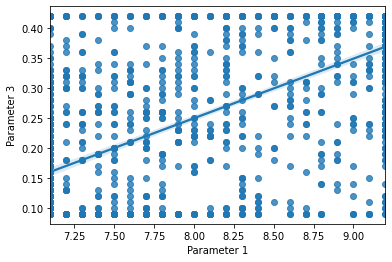

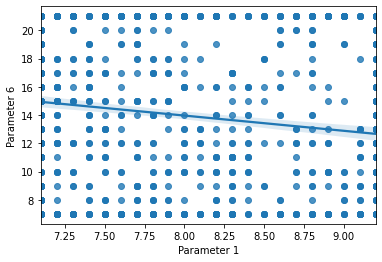

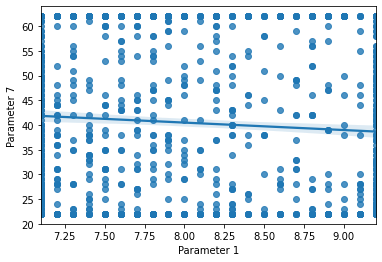

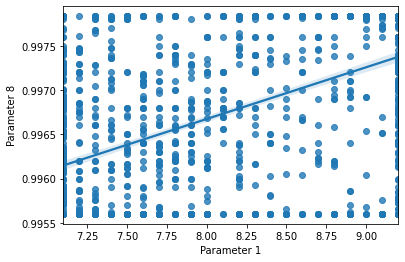

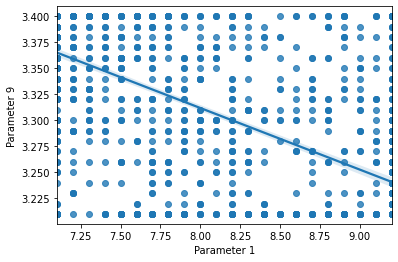

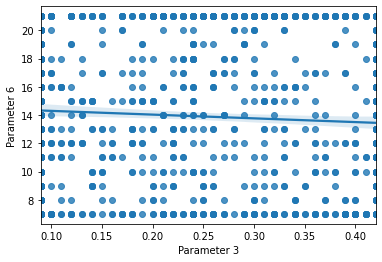

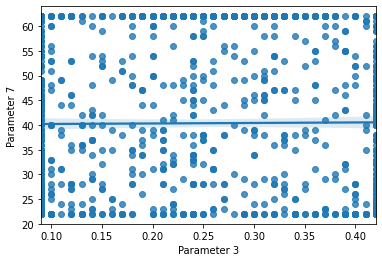

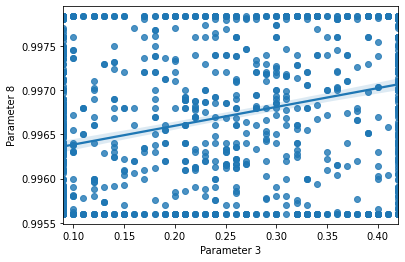

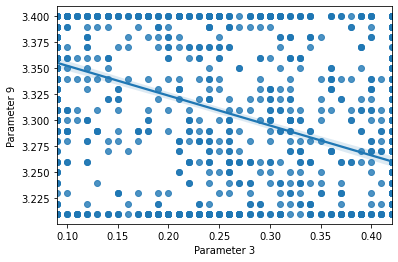

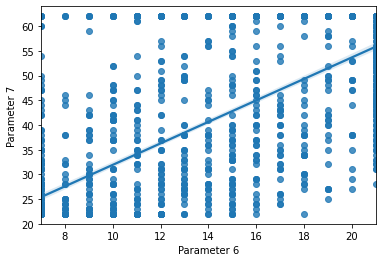

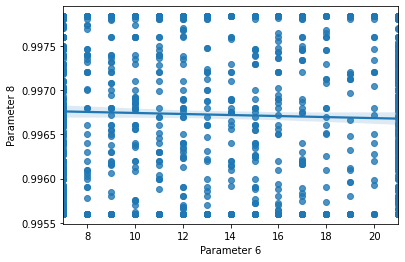

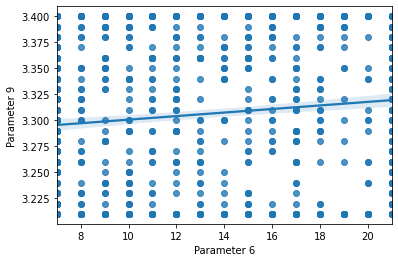

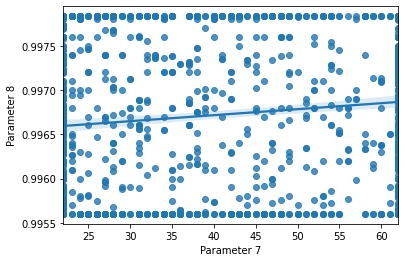

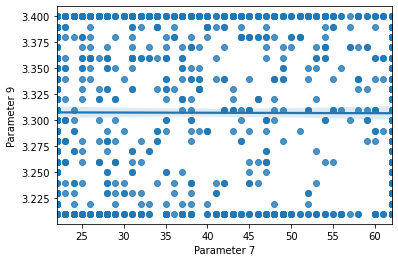

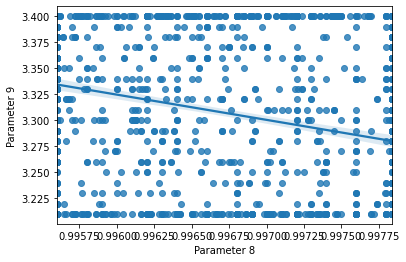

In [40]:
for each1,each2 in itertools.combinations(parameter_interest1,2):
    sns.regplot(x=data[each1],y=data[each2])
    plt.show()
    plt.close() # None of the functions are completely nonlinear.

<AxesSubplot:title={'center':'Correlation Measurement'}>

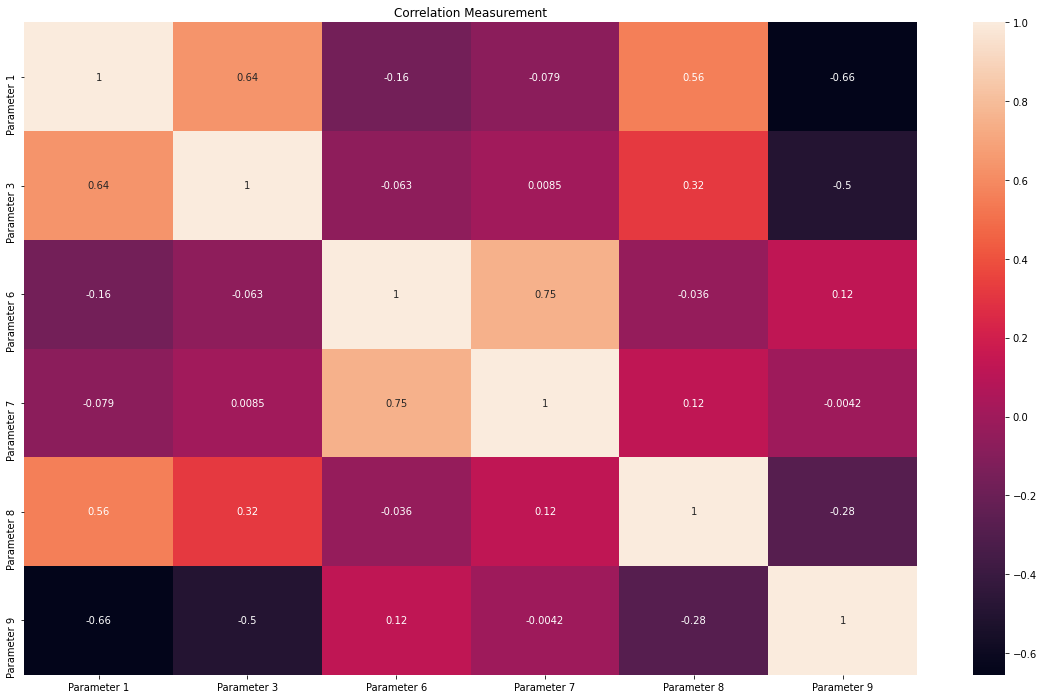

In [41]:
plt.figure(figsize=(20,12))
plt.title("Correlation Measurement")
sns.heatmap(data2[parameter_interest1].corr(),annot=True)

<AxesSubplot:title={'center':'Correlation Measurement'}>

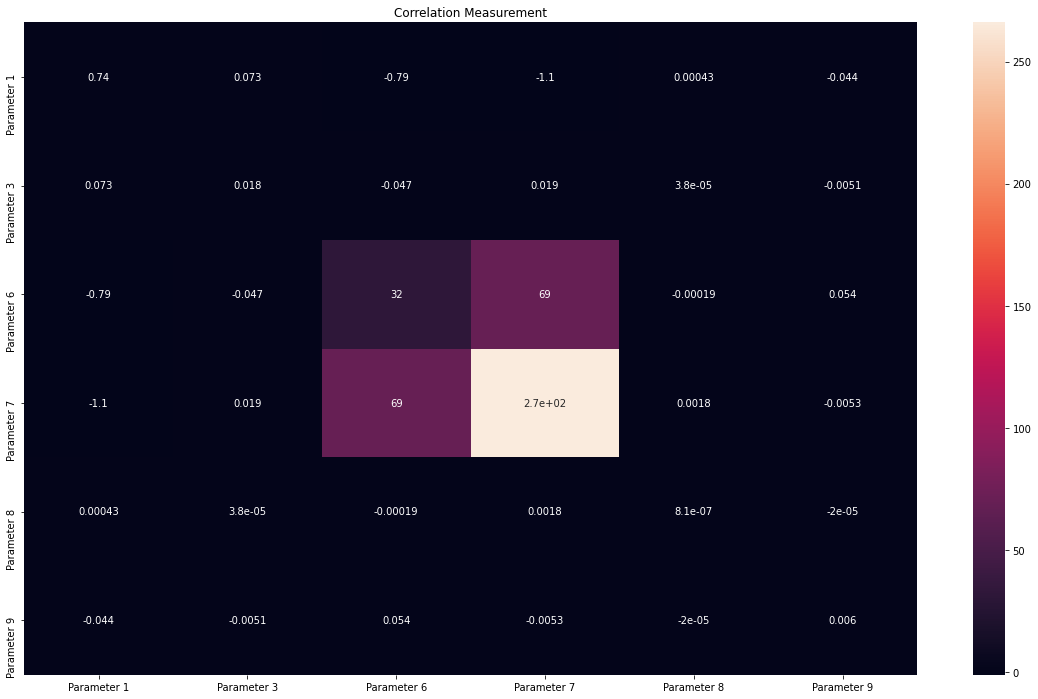

In [42]:
plt.figure(figsize=(20,12))
plt.title("Correlation Measurement")
sns.heatmap(data2[parameter_interest1].cov(),annot=True)

Thre is a only a very little difference between using Neural Network as a regressor and Neural network as a classifier. Only the output layer and the softmax function that changes the scenario. So,keeping that in the mind, we can first go for training it as a regressor, then we can make a small modification to our original data and make it as an classifier column and then go for the classifier Neural Network.


**please note**

Please note that the Object Oriented approach and the classification has been avoided completely and the process is simplified a lot. The approach is shifted to the part3 of the project where it becomes a necessity to go for class approach.
The first two parts of the project that we are dealing with here are considered as a starting point, a stepping stone, for the part3 of the project. Hence, from the point of view of maximum flexibility and freedom from my perspective, it has been thought that these models will be envisaged to be used in that file as it is.

**Approach Taken**

Though there went a number of trials into developing these models, all of them are not noted or continued here. So, there are three trials with respect to both categorical and regressional approach to the data.

First Trial is without the validation set involved.
Second trial is with the validation set invovled.
Third trial is the performance metrics after performing some PCA because we saw some dimensions were pretty useless so, reduce the dimensions in the data and take thes same again.
Fourth trial is nothing but one of the samples of the iterations that I took i.e. things like changing the number of layers, the batch size, the number of epochs etc. 

In [43]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as k
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Reshape, BatchNormalization, Dropout

In [44]:
X_train1, X_valid, y_train1, y_valid = train_test_split(data.drop("Signal_Strength",axis=1), data["Signal_Strength"], random_state=0)

In [45]:
######################################################
# Function Converting predicted probabilities into class labels.
######################################################
def convert_to_class_labels(y_predicted):
    class_predicted=[]
    y_pred=y_predicted
    class_labels=y_pred.shape[1]
    for each in y_pred :
        array=each
        for n in range(len(array)):
            if array[n]==array.max():
                class_predicted.append(n)
    return class_predicted
########################################################
#
#######################################################

# Categorical Neural Network - Trial 1

In [46]:

###################################################################
#Categorical Neural Network
###################################################################
model_cat_1=k.Sequential()
#model_cat_1.add(Flatten(input_shape=(X_train.shape[1],)))
#model_cat_1.add(Reshape((784,),input_shape=(X_train.shape[0],X_train.shape[1],)))
model_cat_1.add(BatchNormalization())
model_cat_1.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dropout(0.2, input_shape=(60,)))
model_cat_1.add(Dense(30,activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dropout(0.2, input_shape=(30,)))
#model_cat_1.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.4, input_shape=(60,)))
#model_cat_1.add(Dense(60,activation="relu",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.2, input_shape=(60,)))
model_cat_1.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dropout(0.4, input_shape=(60,)))
model_cat_1.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dropout(0.2, input_shape=(30,)))
model_cat_1.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dropout(0.2, input_shape=(30,)))
model_cat_1.add(Dense(15,activation="sigmoid",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dense(9,activation="softmax"))
sgd = optimizers.SGD(lr = 0.01,momentum=0.3)
model_cat_1.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.CategoricalAccuracy())

t=time.time()
###################################################################
#
###################################################################
history_cat_1=model_cat_1.fit(X_train1,k.utils.to_categorical(y_train1),batch_size=100, epochs = 500, verbose = 1)
print("Total Time Taken is : ",t-time.time())

Epoch 1/500
12/12 [==============================] - 1s 4ms/step - loss: 0.2980 - categorical_accuracy: 0.0090
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 0.2968 - categorical_accuracy: 0.0082
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 0.2947 - categorical_accuracy: 0.0125
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2932 - categorical_accuracy: 0.0076
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2926 - categorical_accuracy: 0.0081
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2906 - categorical_accuracy: 0.0078
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 0.2888 - categorical_accuracy: 0.0092
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 0.2879 - categorical_accuracy: 0.0056
Epoch 9/500
12/12 [==============================] - 0s 3ms/step - loss: 0.2862 - categorical_accuracy: 0.0111
E

12/12 [==============================] - 0s 3ms/step - loss: 0.2177 - categorical_accuracy: 0.0115
Epoch 74/500
12/12 [==============================] - 0s 3ms/step - loss: 0.2165 - categorical_accuracy: 0.0125
Epoch 75/500
12/12 [==============================] - 0s 3ms/step - loss: 0.2159 - categorical_accuracy: 0.0108
Epoch 76/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2146 - categorical_accuracy: 0.0110
Epoch 77/500
12/12 [==============================] - 0s 3ms/step - loss: 0.2135 - categorical_accuracy: 0.0077
Epoch 78/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2128 - categorical_accuracy: 0.0154
Epoch 79/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2120 - categorical_accuracy: 0.0137
Epoch 80/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2116 - categorical_accuracy: 0.0099
Epoch 81/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2109 - categorical_accuracy: 0.0130
Epoch

12/12 [==============================] - 0s 3ms/step - loss: 0.1662 - categorical_accuracy: 0.4017
Epoch 146/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1661 - categorical_accuracy: 0.3950
Epoch 147/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1655 - categorical_accuracy: 0.3951
Epoch 148/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1651 - categorical_accuracy: 0.3892
Epoch 149/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1639 - categorical_accuracy: 0.3959
Epoch 150/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1636 - categorical_accuracy: 0.3758
Epoch 151/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1632 - categorical_accuracy: 0.3794
Epoch 152/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1630 - categorical_accuracy: 0.3866
Epoch 153/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1622 - categorical_accuracy: 0.39

12/12 [==============================] - 0s 3ms/step - loss: 0.1341 - categorical_accuracy: 0.3906
Epoch 218/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1338 - categorical_accuracy: 0.3848
Epoch 219/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1335 - categorical_accuracy: 0.3850
Epoch 220/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1321 - categorical_accuracy: 0.4080
Epoch 221/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1332 - categorical_accuracy: 0.3708
Epoch 222/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1319 - categorical_accuracy: 0.3952
Epoch 223/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1316 - categorical_accuracy: 0.3896
Epoch 224/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1323 - categorical_accuracy: 0.3788
Epoch 225/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1312 - categorical_accuracy: 0.39

12/12 [==============================] - 0s 4ms/step - loss: 0.1138 - categorical_accuracy: 0.3956
Epoch 290/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1138 - categorical_accuracy: 0.3902
Epoch 291/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1137 - categorical_accuracy: 0.3875
Epoch 292/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1117 - categorical_accuracy: 0.4188
Epoch 293/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1137 - categorical_accuracy: 0.3821
Epoch 294/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1130 - categorical_accuracy: 0.3893
Epoch 295/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1125 - categorical_accuracy: 0.3969
Epoch 296/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1116 - categorical_accuracy: 0.4071
Epoch 297/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1126 - categorical_accuracy: 0.38

12/12 [==============================] - 0s 3ms/step - loss: 0.0999 - categorical_accuracy: 0.4038
Epoch 362/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1007 - categorical_accuracy: 0.3833
Epoch 363/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1009 - categorical_accuracy: 0.3784
Epoch 364/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1002 - categorical_accuracy: 0.3865
Epoch 365/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0993 - categorical_accuracy: 0.4043
Epoch 366/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1002 - categorical_accuracy: 0.3825
Epoch 367/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0994 - categorical_accuracy: 0.3938
Epoch 368/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0993 - categorical_accuracy: 0.3927
Epoch 369/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0982 - categorical_accuracy: 0.40

12/12 [==============================] - 0s 3ms/step - loss: 0.0900 - categorical_accuracy: 0.3863
Epoch 434/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0896 - categorical_accuracy: 0.3992
Epoch 435/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0900 - categorical_accuracy: 0.3880
Epoch 436/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0897 - categorical_accuracy: 0.4008
Epoch 437/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0893 - categorical_accuracy: 0.3973
Epoch 438/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0896 - categorical_accuracy: 0.3806
Epoch 439/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0894 - categorical_accuracy: 0.3886
Epoch 440/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0886 - categorical_accuracy: 0.4059
Epoch 441/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0887 - categorical_accuracy: 0.40

In [47]:
labels=y_train1.astype("category").dtype.categories
from sklearn.preprocessing import OneHotEncoder as encode
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
####################################################
y_pred_cat_1=model_cat_1.predict(X_valid)
y_pred_cat_1

array([[0.04842279, 0.04335862, 0.04329705, ..., 0.32042548, 0.10905707,
        0.06233366],
       [0.04842279, 0.04335862, 0.04329705, ..., 0.32042548, 0.10905707,
        0.06233366],
       [0.04842279, 0.04335862, 0.04329705, ..., 0.32042548, 0.10905707,
        0.06233366],
       ...,
       [0.04842279, 0.04335862, 0.04329705, ..., 0.32042548, 0.10905707,
        0.06233366],
       [0.04842279, 0.04335862, 0.04329705, ..., 0.32042548, 0.10905707,
        0.06233366],
       [0.04842279, 0.04335862, 0.04329705, ..., 0.32042548, 0.10905707,
        0.06233366]], dtype=float32)

The Accuracy of the model is :  0.425


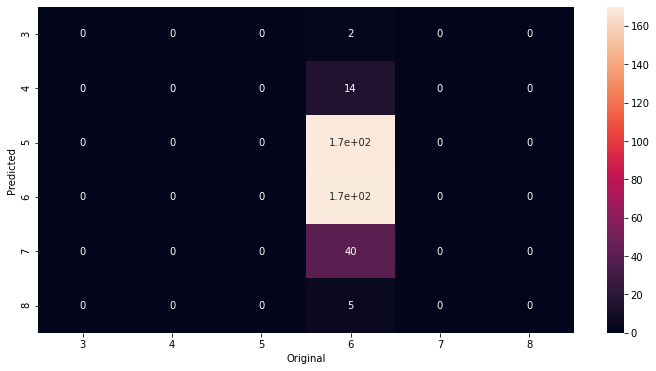

In [48]:

print("The Accuracy of the model is : ",accuracy_score(y_valid,convert_to_class_labels(y_pred_cat_1)))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_valid,convert_to_class_labels(y_pred_cat_1)),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'categorical_accuracy'])


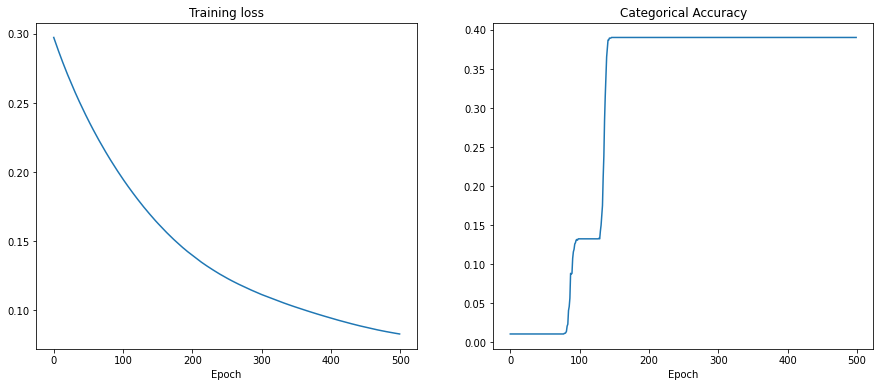

In [51]:
history=history_cat_1.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["categorical_accuracy"])
ax.set_title("Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()


# Regressional Neural Network - Trial 1

In [52]:

###################################################################
#Regressional Neural Network
###################################################################
model_reg_1=k.Sequential()
model_reg_1.add(BatchNormalization(input_shape=(X_train1.shape[1],)))
model_reg_1.add(Flatten())
model_reg_1.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1.add(Dropout(0.2, input_shape=(50,)))
model_reg_1.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1.add(Dropout(0.2, input_shape=(50,)))
model_reg_1.add(Dense(30,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_reg_1.add(Dropout(0.5, input_shape=(50,)))
#model_reg_1.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_reg_1.add(Dropout(0.2, input_shape=(50,)))
#model_reg_1.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1.add(Dropout(0.5, input_shape=(30,)))
model_reg_1.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1.add(Dense(1))
sgd = optimizers.SGD(lr = 0.01,momentum=0.6)
model_reg_1.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.MeanSquaredError())
###################################################################
#
###################################################################

t=time.time()
history_reg_1=model_reg_1.fit(X_train1,y_train1,batch_size=100, epochs = 500) #add verbose later
print("Total Time Taken is : ",t-time.time())

Epoch 1/500
12/12 [==============================] - 1s 3ms/step - loss: 23.4534 - mean_squared_error: 23.3990
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 0.8186 - mean_squared_error: 0.7310
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 0.7934 - mean_squared_error: 0.7081
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 0.7848 - mean_squared_error: 0.7005
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.7520 - mean_squared_error: 0.6686
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 0.7071 - mean_squared_error: 0.6242
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 0.7407 - mean_squared_error: 0.6587
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 0.7514 - mean_squared_error: 0.6700
Epoch 9/500
12/12 [==============================] - 0s 3ms/step - loss: 0.7434 - mean_squared_error: 0.6626
Epoch 10/500
12/1

12/12 [==============================] - 0s 3ms/step - loss: 0.5390 - mean_squared_error: 0.4786
Epoch 76/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5678 - mean_squared_error: 0.5077
Epoch 77/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5392 - mean_squared_error: 0.4793
Epoch 78/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5400 - mean_squared_error: 0.4808
Epoch 79/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5069 - mean_squared_error: 0.4478
Epoch 80/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4847 - mean_squared_error: 0.4252
Epoch 81/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5202 - mean_squared_error: 0.4614
Epoch 82/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5439 - mean_squared_error: 0.4854
Epoch 83/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5145 - mean_squared_error: 0.4558
Epoch 84/500
12/12 [===

12/12 [==============================] - 0s 3ms/step - loss: 0.4752 - mean_squared_error: 0.4283
Epoch 150/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4950 - mean_squared_error: 0.4480
Epoch 151/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4814 - mean_squared_error: 0.4348
Epoch 152/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4813 - mean_squared_error: 0.4349
Epoch 153/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4982 - mean_squared_error: 0.4522
Epoch 154/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5202 - mean_squared_error: 0.4741
Epoch 155/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5066 - mean_squared_error: 0.4603
Epoch 156/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4739 - mean_squared_error: 0.4274
Epoch 157/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4926 - mean_squared_error: 0.4466
Epoch 158/500
1

12/12 [==============================] - 0s 3ms/step - loss: 0.5111 - mean_squared_error: 0.4695
Epoch 223/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4840 - mean_squared_error: 0.4423
Epoch 224/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4661 - mean_squared_error: 0.4247
Epoch 225/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4884 - mean_squared_error: 0.4468
Epoch 226/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4864 - mean_squared_error: 0.4451
Epoch 227/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4781 - mean_squared_error: 0.4369
Epoch 228/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4684 - mean_squared_error: 0.4268
Epoch 229/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4873 - mean_squared_error: 0.4457
Epoch 230/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4769 - mean_squared_error: 0.4358
Epoch 231/500
1

12/12 [==============================] - 0s 3ms/step - loss: 0.4780 - mean_squared_error: 0.4388
Epoch 296/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4616 - mean_squared_error: 0.4225
Epoch 297/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4872 - mean_squared_error: 0.4482
Epoch 298/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4546 - mean_squared_error: 0.4155
Epoch 299/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4782 - mean_squared_error: 0.4389
Epoch 300/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4778 - mean_squared_error: 0.4390
Epoch 301/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4643 - mean_squared_error: 0.4255
Epoch 302/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4757 - mean_squared_error: 0.4370
Epoch 303/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4575 - mean_squared_error: 0.4188
Epoch 304/500
1

12/12 [==============================] - 0s 3ms/step - loss: 0.4691 - mean_squared_error: 0.4311
Epoch 369/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4570 - mean_squared_error: 0.4188
Epoch 370/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4316 - mean_squared_error: 0.3935
Epoch 371/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4949 - mean_squared_error: 0.4565
Epoch 372/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4283 - mean_squared_error: 0.3901
Epoch 373/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4576 - mean_squared_error: 0.4190
Epoch 374/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4632 - mean_squared_error: 0.4247
Epoch 375/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4660 - mean_squared_error: 0.4277
Epoch 376/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4842 - mean_squared_error: 0.4459
Epoch 377/500
1

12/12 [==============================] - 0s 3ms/step - loss: 0.4760 - mean_squared_error: 0.4379
Epoch 442/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4306 - mean_squared_error: 0.3930
Epoch 443/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4613 - mean_squared_error: 0.4233
Epoch 444/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4507 - mean_squared_error: 0.4128
Epoch 445/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4711 - mean_squared_error: 0.4331
Epoch 446/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4537 - mean_squared_error: 0.4157
Epoch 447/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4748 - mean_squared_error: 0.4368
Epoch 448/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4503 - mean_squared_error: 0.4120
Epoch 449/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4430 - mean_squared_error: 0.4049
Epoch 450/500
1

The Accuracy of the model is :  0.53


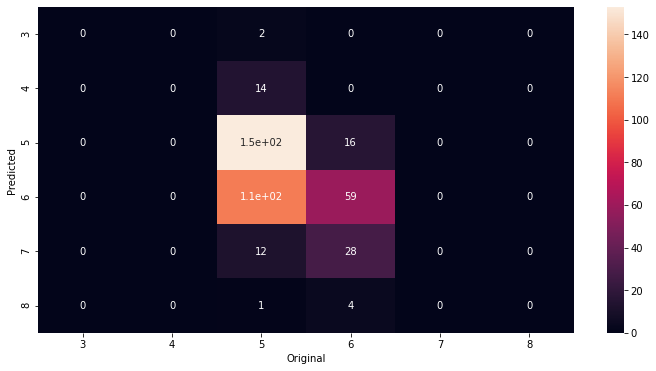

In [53]:
y_pred_reg_1=model_reg_1.predict(X_valid).astype("int64")
###########################################################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("The Accuracy of the model is : ",accuracy_score(y_valid,y_pred_reg_1))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_valid,y_pred_reg_1),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'mean_squared_error'])


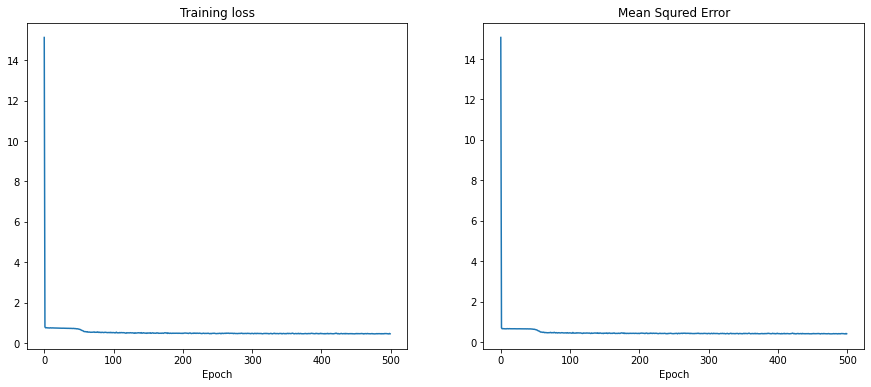

In [55]:
history=history_reg_1.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["mean_squared_error"])
ax.set_title("Mean Squred Error")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()

**Some Experimentation** 

We will drop some columns that show some redundancy and check if the model improves, and if so how. We will also try to do some PCA on the parameters to make them good. 

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X_train1,y_train1,test_size=0.30,random_state=0)

# Categorical Neural Network - Trial 2


In [57]:
###################################################################
#Categorical Neural Network
###################################################################
model_cat_2=k.Sequential()
#model_cat_2.add(Flatten(input_shape=(X_train.shape[1],)))
#model_cat_2.add(Reshape((784,),input_shape=(X_train.shape[0],X_train.shape[1],)))
model_cat_2.add(BatchNormalization())
model_cat_2.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.2, input_shape=(60,)))
model_cat_2.add(Dense(30,activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.2, input_shape=(30,)))
model_cat_2.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.4, input_shape=(60,)))
model_cat_2.add(Dense(60,activation="relu",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.2, input_shape=(60,)))
model_cat_2.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.4, input_shape=(60,)))
model_cat_2.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.2, input_shape=(30,)))
model_cat_2.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.2, input_shape=(30,)))
model_cat_2.add(Dense(15,activation="sigmoid",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dense(9,activation="softmax"))
sgd = optimizers.SGD(lr = 0.01,momentum=0.3)
model_cat_2.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.CategoricalAccuracy())

t=time.time()
###################################################################
#
###################################################################
history_cat_2=model_cat_2.fit(X_train,k.utils.to_categorical(y_train),validation_data = (X_valid,k.utils.to_categorical(y_valid)),batch_size=100, epochs = 500, verbose = 1)
print("Total Time Taken is : ",t-time.time())

Epoch 1/500
9/9 [==============================] - 1s 41ms/step - loss: 0.4718 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4700 - val_categorical_accuracy: 0.0000e+00
Epoch 2/500
9/9 [==============================] - 0s 11ms/step - loss: 0.4697 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4679 - val_categorical_accuracy: 0.0000e+00
Epoch 3/500
9/9 [==============================] - 0s 11ms/step - loss: 0.4676 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4658 - val_categorical_accuracy: 0.0000e+00
Epoch 4/500
9/9 [==============================] - 0s 11ms/step - loss: 0.4653 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4638 - val_categorical_accuracy: 0.0000e+00
Epoch 5/500
9/9 [==============================] - 0s 11ms/step - loss: 0.4639 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4617 - val_categorical_accuracy: 0.0000e+00
Epoch 6/500
9/9 [==============================] - 0s 11ms/step - loss: 0.4615 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4597 - val_c

9/9 [==============================] - 0s 8ms/step - loss: 0.3863 - categorical_accuracy: 0.0000e+00 - val_loss: 0.3840 - val_categorical_accuracy: 0.0000e+00
Epoch 49/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3840 - categorical_accuracy: 0.0000e+00 - val_loss: 0.3824 - val_categorical_accuracy: 0.0000e+00
Epoch 50/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3829 - categorical_accuracy: 0.0000e+00 - val_loss: 0.3808 - val_categorical_accuracy: 0.0000e+00
Epoch 51/500
9/9 [==============================] - 0s 9ms/step - loss: 0.3808 - categorical_accuracy: 0.0000e+00 - val_loss: 0.3792 - val_categorical_accuracy: 0.0000e+00
Epoch 52/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3797 - categorical_accuracy: 0.0000e+00 - val_loss: 0.3776 - val_categorical_accuracy: 0.0000e+00
Epoch 53/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3775 - categorical_accuracy: 0.0063 - val_loss: 0.3761 - val_categorical_accura

Epoch 98/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3155 - categorical_accuracy: 0.3931 - val_loss: 0.3139 - val_categorical_accuracy: 0.4250
Epoch 99/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3148 - categorical_accuracy: 0.3915 - val_loss: 0.3127 - val_categorical_accuracy: 0.4250
Epoch 100/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3139 - categorical_accuracy: 0.3760 - val_loss: 0.3115 - val_categorical_accuracy: 0.4250
Epoch 101/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3126 - categorical_accuracy: 0.3818 - val_loss: 0.3103 - val_categorical_accuracy: 0.4250
Epoch 102/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3116 - categorical_accuracy: 0.3835 - val_loss: 0.3091 - val_categorical_accuracy: 0.4250
Epoch 103/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3110 - categorical_accuracy: 0.3719 - val_loss: 0.3079 - val_categorical_accuracy: 0.4250
Epoch 104/50

Epoch 148/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2626 - categorical_accuracy: 0.3912 - val_loss: 0.2605 - val_categorical_accuracy: 0.4250
Epoch 149/500
9/9 [==============================] - 0s 9ms/step - loss: 0.2613 - categorical_accuracy: 0.4014 - val_loss: 0.2596 - val_categorical_accuracy: 0.4250
Epoch 150/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2603 - categorical_accuracy: 0.4023 - val_loss: 0.2587 - val_categorical_accuracy: 0.4250
Epoch 151/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2600 - categorical_accuracy: 0.3891 - val_loss: 0.2577 - val_categorical_accuracy: 0.4250
Epoch 152/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2589 - categorical_accuracy: 0.3952 - val_loss: 0.2568 - val_categorical_accuracy: 0.4250
Epoch 153/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2572 - categorical_accuracy: 0.4034 - val_loss: 0.2559 - val_categorical_accuracy: 0.4250
Epoch 154/

Epoch 198/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2216 - categorical_accuracy: 0.3933 - val_loss: 0.2197 - val_categorical_accuracy: 0.4250
Epoch 199/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2214 - categorical_accuracy: 0.3902 - val_loss: 0.2190 - val_categorical_accuracy: 0.4250
Epoch 200/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2204 - categorical_accuracy: 0.3904 - val_loss: 0.2183 - val_categorical_accuracy: 0.4250
Epoch 201/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2213 - categorical_accuracy: 0.3613 - val_loss: 0.2176 - val_categorical_accuracy: 0.4250
Epoch 202/500
9/9 [==============================] - 0s 9ms/step - loss: 0.2186 - categorical_accuracy: 0.3970 - val_loss: 0.2169 - val_categorical_accuracy: 0.4250
Epoch 203/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2190 - categorical_accuracy: 0.3766 - val_loss: 0.2162 - val_categorical_accuracy: 0.4250
Epoch 204/

Epoch 248/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1897 - categorical_accuracy: 0.4034 - val_loss: 0.1881 - val_categorical_accuracy: 0.4250
Epoch 249/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1897 - categorical_accuracy: 0.3923 - val_loss: 0.1875 - val_categorical_accuracy: 0.4250
Epoch 250/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1904 - categorical_accuracy: 0.3698 - val_loss: 0.1870 - val_categorical_accuracy: 0.4250
Epoch 251/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1892 - categorical_accuracy: 0.3791 - val_loss: 0.1864 - val_categorical_accuracy: 0.4250
Epoch 252/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1878 - categorical_accuracy: 0.3961 - val_loss: 0.1859 - val_categorical_accuracy: 0.4250
Epoch 253/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1871 - categorical_accuracy: 0.3970 - val_loss: 0.1853 - val_categorical_accuracy: 0.4250
Epoch 254/

Epoch 298/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1652 - categorical_accuracy: 0.3933 - val_loss: 0.1632 - val_categorical_accuracy: 0.4250
Epoch 299/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1633 - categorical_accuracy: 0.4177 - val_loss: 0.1628 - val_categorical_accuracy: 0.4250
Epoch 300/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1645 - categorical_accuracy: 0.3905 - val_loss: 0.1624 - val_categorical_accuracy: 0.4250
Epoch 301/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1646 - categorical_accuracy: 0.3809 - val_loss: 0.1619 - val_categorical_accuracy: 0.4250
Epoch 302/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1643 - categorical_accuracy: 0.3794 - val_loss: 0.1615 - val_categorical_accuracy: 0.4250
Epoch 303/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1628 - categorical_accuracy: 0.3980 - val_loss: 0.1610 - val_categorical_accuracy: 0.4250
Epoch 304/

Epoch 348/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1455 - categorical_accuracy: 0.3868 - val_loss: 0.1433 - val_categorical_accuracy: 0.4250
Epoch 349/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1434 - categorical_accuracy: 0.4197 - val_loss: 0.1430 - val_categorical_accuracy: 0.4250
Epoch 350/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1459 - categorical_accuracy: 0.3672 - val_loss: 0.1426 - val_categorical_accuracy: 0.4250
Epoch 351/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1454 - categorical_accuracy: 0.3686 - val_loss: 0.1423 - val_categorical_accuracy: 0.4250
Epoch 352/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1453 - categorical_accuracy: 0.3623 - val_loss: 0.1419 - val_categorical_accuracy: 0.4250
Epoch 353/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1434 - categorical_accuracy: 0.3924 - val_loss: 0.1416 - val_categorical_accuracy: 0.4250
Epoch 354/

Epoch 398/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1287 - categorical_accuracy: 0.3962 - val_loss: 0.1272 - val_categorical_accuracy: 0.4250
Epoch 399/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1280 - categorical_accuracy: 0.4083 - val_loss: 0.1269 - val_categorical_accuracy: 0.4250
Epoch 400/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1288 - categorical_accuracy: 0.3819 - val_loss: 0.1266 - val_categorical_accuracy: 0.4250
Epoch 401/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1282 - categorical_accuracy: 0.3914 - val_loss: 0.1263 - val_categorical_accuracy: 0.4250
Epoch 402/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1275 - categorical_accuracy: 0.4001 - val_loss: 0.1260 - val_categorical_accuracy: 0.4250
Epoch 403/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1279 - categorical_accuracy: 0.3797 - val_loss: 0.1257 - val_categorical_accuracy: 0.4250
Epoch 404/

Epoch 448/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1158 - categorical_accuracy: 0.3944 - val_loss: 0.1141 - val_categorical_accuracy: 0.4250
Epoch 449/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1157 - categorical_accuracy: 0.3810 - val_loss: 0.1139 - val_categorical_accuracy: 0.4250
Epoch 450/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1149 - categorical_accuracy: 0.3932 - val_loss: 0.1137 - val_categorical_accuracy: 0.4250
Epoch 451/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1156 - categorical_accuracy: 0.3757 - val_loss: 0.1134 - val_categorical_accuracy: 0.4250
Epoch 452/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1142 - categorical_accuracy: 0.3992 - val_loss: 0.1132 - val_categorical_accuracy: 0.4250
Epoch 453/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1147 - categorical_accuracy: 0.3821 - val_loss: 0.1130 - val_categorical_accuracy: 0.4250
Epoch 454/

Epoch 498/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1052 - categorical_accuracy: 0.3948 - val_loss: 0.1039 - val_categorical_accuracy: 0.4250
Epoch 499/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1061 - categorical_accuracy: 0.3738 - val_loss: 0.1038 - val_categorical_accuracy: 0.4250
Epoch 500/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1054 - categorical_accuracy: 0.3661 - val_loss: 0.1036 - val_categorical_accuracy: 0.4250
Total Time Taken is :  -37.377182483673096


The Accuracy of the model is :  0.3972222222222222


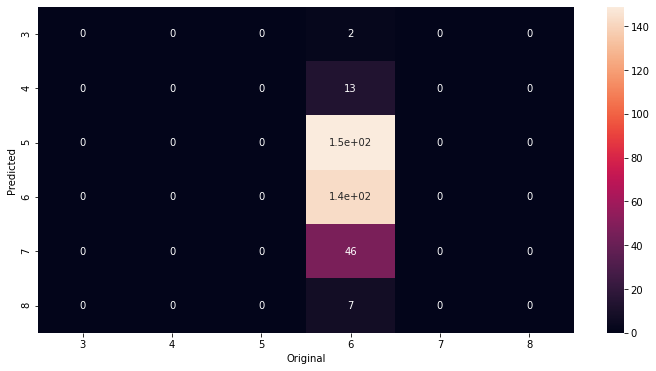

In [58]:
y_pred_cat_2=model_cat_2.predict(X_test)

print("The Accuracy of the model is : ",accuracy_score(y_test,convert_to_class_labels(y_pred_cat_2)))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,convert_to_class_labels(y_pred_cat_2)),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


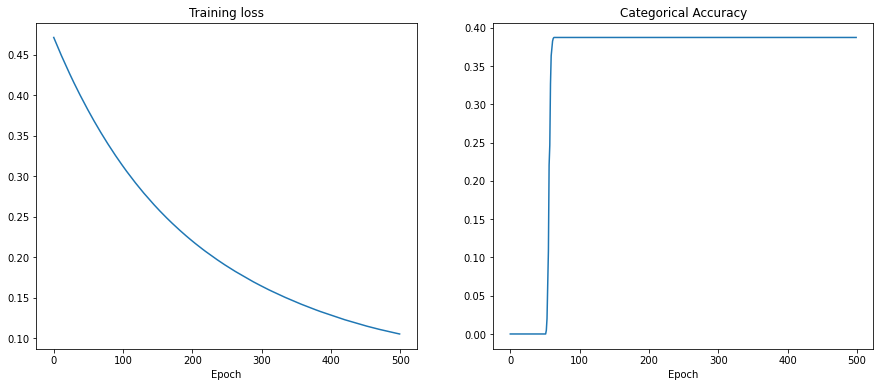

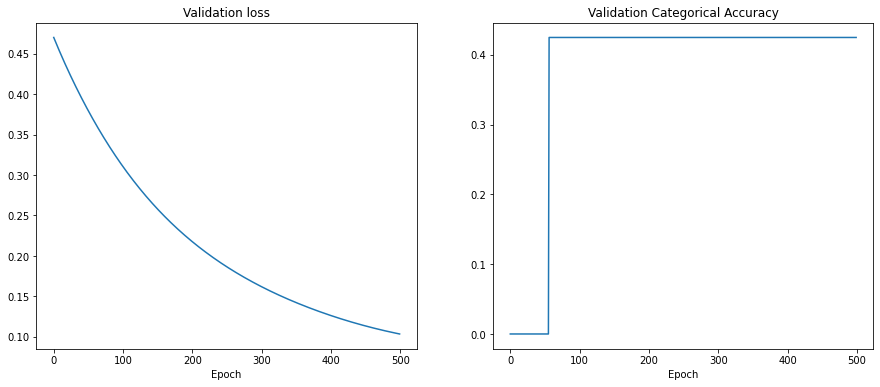

In [61]:
history=history_cat_2.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["categorical_accuracy"])
ax.set_title("Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()
#
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["val_loss"])
ax.set_title("Validation loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["val_categorical_accuracy"])
ax.set_title("Validation Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()

# Regression Neural Network - Trial 2


In [62]:
###################################################################
#Regressional Neural Network
###################################################################
model_reg_2=k.Sequential()
model_reg_2.add(BatchNormalization(input_shape=(X_train1.shape[1],)))
model_reg_2.add(Flatten())
model_reg_2.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_2.add(Dropout(0.2, input_shape=(50,)))
model_reg_2.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_2.add(Dropout(0.2, input_shape=(50,)))
model_reg_2.add(Dense(30,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_2.add(Dropout(0.5, input_shape=(50,)))
model_reg_2.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_2.add(Dropout(0.2, input_shape=(50,)))
model_reg_2.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_2.add(Dropout(0.5, input_shape=(30,)))
model_reg_2.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_2.add(Dense(1))
sgd = optimizers.SGD(lr = 0.01,momentum=0.6)
model_reg_2.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.MeanSquaredError())
###################################################################
#
###################################################################

t=time.time()
history_reg_2=model_reg_2.fit(X_train,y_train,validation_data = (X_valid.to_numpy(),y_valid),batch_size=100, epochs = 500) #add verbose later
print("Total Time Taken is : ",t-time.time())


Epoch 1/500
9/9 [==============================] - 1s 29ms/step - loss: 25.3803 - mean_squared_error: 25.2858 - val_loss: 2.2608 - val_mean_squared_error: 2.1427
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 1.4262 - mean_squared_error: 1.3011 - val_loss: 0.7414 - val_mean_squared_error: 0.6133
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 0.8120 - mean_squared_error: 0.6845 - val_loss: 0.7397 - val_mean_squared_error: 0.6126
Epoch 4/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7531 - mean_squared_error: 0.6264 - val_loss: 0.7372 - val_mean_squared_error: 0.6113
Epoch 5/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7704 - mean_squared_error: 0.6449 - val_loss: 0.7410 - val_mean_squared_error: 0.6156
Epoch 6/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7940 - mean_squared_error: 0.6688 - val_loss: 0.7364 - val_mean_squared_error: 0.6129
Epoch 7/500
9/9 [==========================

Epoch 52/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7315 - mean_squared_error: 0.6437 - val_loss: 0.6995 - val_mean_squared_error: 0.6119
Epoch 53/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7352 - mean_squared_error: 0.6477 - val_loss: 0.6979 - val_mean_squared_error: 0.6112
Epoch 54/500
9/9 [==============================] - 0s 7ms/step - loss: 0.8056 - mean_squared_error: 0.7190 - val_loss: 0.6974 - val_mean_squared_error: 0.6113
Epoch 55/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7200 - mean_squared_error: 0.6339 - val_loss: 0.6970 - val_mean_squared_error: 0.6114
Epoch 56/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7776 - mean_squared_error: 0.6921 - val_loss: 0.6961 - val_mean_squared_error: 0.6115
Epoch 57/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7401 - mean_squared_error: 0.6553 - val_loss: 0.6966 - val_mean_squared_error: 0.6127
Epoch 58/500
9/9 [======================

9/9 [==============================] - 0s 7ms/step - loss: 0.7124 - mean_squared_error: 0.6515 - val_loss: 0.6744 - val_mean_squared_error: 0.6133
Epoch 104/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6912 - mean_squared_error: 0.6303 - val_loss: 0.6754 - val_mean_squared_error: 0.6146
Epoch 105/500
9/9 [==============================] - 0s 8ms/step - loss: 0.7458 - mean_squared_error: 0.6851 - val_loss: 0.6720 - val_mean_squared_error: 0.6119
Epoch 106/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7155 - mean_squared_error: 0.6554 - val_loss: 0.6709 - val_mean_squared_error: 0.6115
Epoch 107/500
9/9 [==============================] - 0s 8ms/step - loss: 0.7296 - mean_squared_error: 0.6704 - val_loss: 0.6713 - val_mean_squared_error: 0.6120
Epoch 108/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7293 - mean_squared_error: 0.6702 - val_loss: 0.6704 - val_mean_squared_error: 0.6115
Epoch 109/500
9/9 [=============================

Epoch 154/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6757 - mean_squared_error: 0.6321 - val_loss: 0.6609 - val_mean_squared_error: 0.6168
Epoch 155/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6855 - mean_squared_error: 0.6415 - val_loss: 0.6545 - val_mean_squared_error: 0.6112
Epoch 156/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6789 - mean_squared_error: 0.6355 - val_loss: 0.6557 - val_mean_squared_error: 0.6130
Epoch 157/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7206 - mean_squared_error: 0.6778 - val_loss: 0.6552 - val_mean_squared_error: 0.6122
Epoch 158/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7312 - mean_squared_error: 0.6883 - val_loss: 0.6538 - val_mean_squared_error: 0.6113
Epoch 159/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6857 - mean_squared_error: 0.6433 - val_loss: 0.6544 - val_mean_squared_error: 0.6120
Epoch 160/500
9/9 [===============

Epoch 205/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7187 - mean_squared_error: 0.6862 - val_loss: 0.6448 - val_mean_squared_error: 0.6123
Epoch 206/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - mean_squared_error: 0.6181 - val_loss: 0.6446 - val_mean_squared_error: 0.6123
Epoch 207/500
9/9 [==============================] - 0s 8ms/step - loss: 0.6512 - mean_squared_error: 0.6190 - val_loss: 0.6433 - val_mean_squared_error: 0.6113
Epoch 208/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6459 - mean_squared_error: 0.6140 - val_loss: 0.6436 - val_mean_squared_error: 0.6117
Epoch 209/500
9/9 [==============================] - 0s 8ms/step - loss: 0.6845 - mean_squared_error: 0.6525 - val_loss: 0.6428 - val_mean_squared_error: 0.6112
Epoch 210/500
9/9 [==============================] - 0s 8ms/step - loss: 0.7086 - mean_squared_error: 0.6769 - val_loss: 0.6459 - val_mean_squared_error: 0.6149
Epoch 211/500
9/9 [===============

Epoch 256/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7001 - mean_squared_error: 0.6750 - val_loss: 0.6363 - val_mean_squared_error: 0.6114
Epoch 257/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6704 - mean_squared_error: 0.6455 - val_loss: 0.6360 - val_mean_squared_error: 0.6113
Epoch 258/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6548 - mean_squared_error: 0.6302 - val_loss: 0.6395 - val_mean_squared_error: 0.6146
Epoch 259/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6374 - mean_squared_error: 0.6126 - val_loss: 0.6358 - val_mean_squared_error: 0.6115
Epoch 260/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6773 - mean_squared_error: 0.6530 - val_loss: 0.6355 - val_mean_squared_error: 0.6112
Epoch 261/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7001 - mean_squared_error: 0.6757 - val_loss: 0.6359 - val_mean_squared_error: 0.6116
Epoch 262/500
9/9 [===============

Epoch 307/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6479 - mean_squared_error: 0.6281 - val_loss: 0.6313 - val_mean_squared_error: 0.6118
Epoch 308/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6890 - mean_squared_error: 0.6693 - val_loss: 0.6312 - val_mean_squared_error: 0.6118
Epoch 309/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6809 - mean_squared_error: 0.6614 - val_loss: 0.6313 - val_mean_squared_error: 0.6117
Epoch 310/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6462 - mean_squared_error: 0.6266 - val_loss: 0.6307 - val_mean_squared_error: 0.6113
Epoch 311/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6695 - mean_squared_error: 0.6502 - val_loss: 0.6346 - val_mean_squared_error: 0.6149
Epoch 312/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6021 - mean_squared_error: 0.5824 - val_loss: 0.6305 - val_mean_squared_error: 0.6112
Epoch 313/500
9/9 [===============

Epoch 358/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6765 - mean_squared_error: 0.6600 - val_loss: 0.6283 - val_mean_squared_error: 0.6124
Epoch 359/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6719 - mean_squared_error: 0.6560 - val_loss: 0.6300 - val_mean_squared_error: 0.6136
Epoch 360/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6211 - mean_squared_error: 0.6047 - val_loss: 0.6280 - val_mean_squared_error: 0.6122
Epoch 361/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6752 - mean_squared_error: 0.6596 - val_loss: 0.6302 - val_mean_squared_error: 0.6138
Epoch 362/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6911 - mean_squared_error: 0.6751 - val_loss: 0.6290 - val_mean_squared_error: 0.6128
Epoch 363/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6568 - mean_squared_error: 0.6407 - val_loss: 0.6280 - val_mean_squared_error: 0.6120
Epoch 364/500
9/9 [===============

Epoch 409/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6865 - mean_squared_error: 0.6728 - val_loss: 0.6292 - val_mean_squared_error: 0.6152
Epoch 410/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6905 - mean_squared_error: 0.6767 - val_loss: 0.6255 - val_mean_squared_error: 0.6117
Epoch 411/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6572 - mean_squared_error: 0.6436 - val_loss: 0.6253 - val_mean_squared_error: 0.6116
Epoch 412/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6414 - mean_squared_error: 0.6278 - val_loss: 0.6248 - val_mean_squared_error: 0.6114
Epoch 413/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6630 - mean_squared_error: 0.6495 - val_loss: 0.6249 - val_mean_squared_error: 0.6115
Epoch 414/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6781 - mean_squared_error: 0.6646 - val_loss: 0.6247 - val_mean_squared_error: 0.6112
Epoch 415/500
9/9 [===============

Epoch 460/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6881 - mean_squared_error: 0.6765 - val_loss: 0.6259 - val_mean_squared_error: 0.6138
Epoch 461/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6818 - mean_squared_error: 0.6697 - val_loss: 0.6230 - val_mean_squared_error: 0.6112
Epoch 462/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6600 - mean_squared_error: 0.6481 - val_loss: 0.6230 - val_mean_squared_error: 0.6112
Epoch 463/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6771 - mean_squared_error: 0.6654 - val_loss: 0.6246 - val_mean_squared_error: 0.6126
Epoch 464/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6524 - mean_squared_error: 0.6404 - val_loss: 0.6239 - val_mean_squared_error: 0.6120
Epoch 465/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6575 - mean_squared_error: 0.6456 - val_loss: 0.6234 - val_mean_squared_error: 0.6115
Epoch 466/500
9/9 [===============

The Accuracy of the model is :  0.41388888888888886


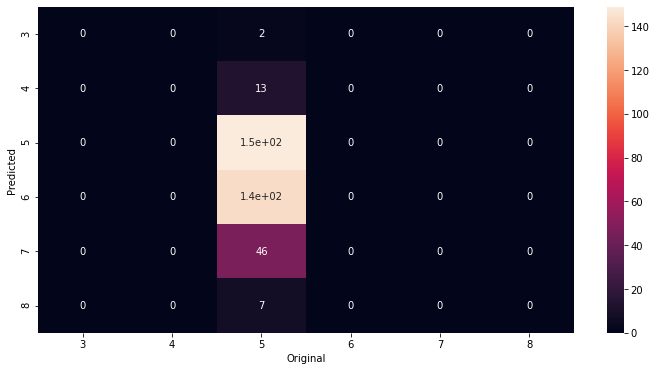

In [63]:
y_pred_reg_2=model_reg_2.predict(X_test).astype("int64")
print("The Accuracy of the model is : ",accuracy_score(y_test,y_pred_reg_2))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,y_pred_reg_2),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


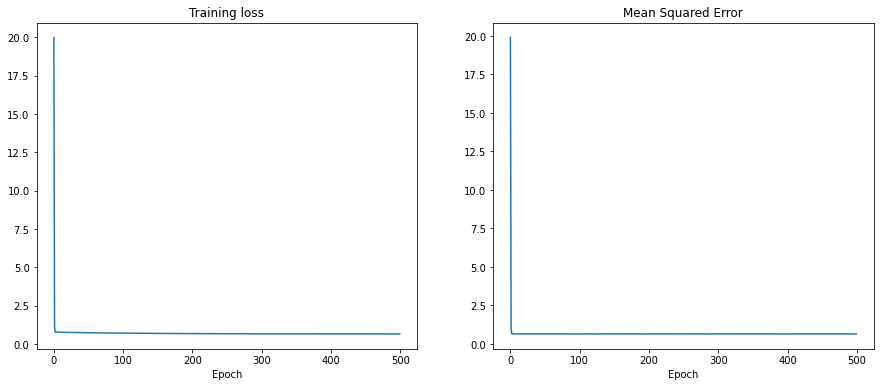

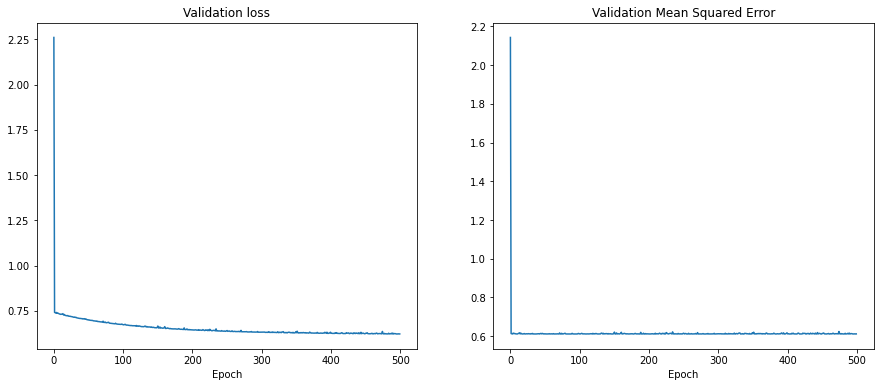

In [65]:
history=history_reg_2.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["mean_squared_error"])
ax.set_title("Mean Squared Error")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()
#
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["val_loss"])
ax.set_title("Validation loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["val_mean_squared_error"])
ax.set_title("Validation Mean Squared Error")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()

Looks like some serious overfitting going on with Categorical Neural Network.

**Some Principal Component Analysis**
Let us do some principal component analysis to eliminate some unknown or redundant dimensions in the data, and redo the whole thing again.

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = StandardScaler().fit_transform(data)
pca = PCA(n_components=6)
data_in = pca.fit_transform(data)
data = pd.DataFrame(data = data_in)

In [67]:
X_train1, X_valid, y_train1, y_valid = train_test_split(data, data_org["Signal_Strength"], random_state=0)
X_train,X_test,y_train,y_test=train_test_split(X_train1,y_train1,test_size=0.30,random_state=0)

# Categorical Neural Network - Trial 3

In [68]:
###################################################################
#Categorical Neural Network
###################################################################
model_cat_3=k.Sequential()
#model_cat_3.add(Flatten(input_shape=(X_train.shape[1],)))
#model_cat_3.add(Reshape((784,),input_shape=(X_train.shape[0],X_train.shape[1],)))
model_cat_3.add(BatchNormalization())
model_cat_3.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.2, input_shape=(60,)))
model_cat_3.add(Dense(30,activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.2, input_shape=(30,)))
model_cat_3.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.4, input_shape=(60,)))
model_cat_3.add(Dense(60,activation="relu",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.2, input_shape=(60,)))
model_cat_3.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.4, input_shape=(60,)))
model_cat_3.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.2, input_shape=(30,)))
model_cat_3.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.2, input_shape=(30,)))
model_cat_3.add(Dense(15,activation="sigmoid",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dense(9,activation="softmax"))
sgd = optimizers.SGD(lr = 0.01,momentum=0.3)
model_cat_3.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.CategoricalAccuracy())

t=time.time()
###################################################################
#
###################################################################
history_cat_3=model_cat_3.fit(X_train,k.utils.to_categorical(y_train),validation_data = (X_valid,k.utils.to_categorical(y_valid)),batch_size=100, epochs = 500, verbose = 1)
print("Total Time Taken is : ",t-time.time())

Epoch 1/500
9/9 [==============================] - 1s 35ms/step - loss: 0.4553 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4531 - val_categorical_accuracy: 0.0000e+00
Epoch 2/500
9/9 [==============================] - 0s 9ms/step - loss: 0.4534 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4511 - val_categorical_accuracy: 0.0000e+00
Epoch 3/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4512 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4491 - val_categorical_accuracy: 0.0000e+00
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4495 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4471 - val_categorical_accuracy: 0.0000e+00
Epoch 5/500
9/9 [==============================] - 0s 9ms/step - loss: 0.4471 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4452 - val_categorical_accuracy: 0.0000e+00
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4453 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4432 - val_catego

Epoch 50/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3682 - categorical_accuracy: 0.3917 - val_loss: 0.3663 - val_categorical_accuracy: 0.4250
Epoch 51/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3668 - categorical_accuracy: 0.3795 - val_loss: 0.3647 - val_categorical_accuracy: 0.4250
Epoch 52/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3651 - categorical_accuracy: 0.3917 - val_loss: 0.3632 - val_categorical_accuracy: 0.4250
Epoch 53/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3642 - categorical_accuracy: 0.3525 - val_loss: 0.3616 - val_categorical_accuracy: 0.4250
Epoch 54/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3622 - categorical_accuracy: 0.3703 - val_loss: 0.3601 - val_categorical_accuracy: 0.4250
Epoch 55/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3604 - categorical_accuracy: 0.3976 - val_loss: 0.3586 - val_categorical_accuracy: 0.4250
Epoch 56/500
9/9

Epoch 100/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2996 - categorical_accuracy: 0.3758 - val_loss: 0.2976 - val_categorical_accuracy: 0.4250
Epoch 101/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2985 - categorical_accuracy: 0.3877 - val_loss: 0.2964 - val_categorical_accuracy: 0.4250
Epoch 102/500
9/9 [==============================] - 0s 9ms/step - loss: 0.2975 - categorical_accuracy: 0.3950 - val_loss: 0.2953 - val_categorical_accuracy: 0.4250
Epoch 103/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2963 - categorical_accuracy: 0.3667 - val_loss: 0.2941 - val_categorical_accuracy: 0.4250
Epoch 104/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2951 - categorical_accuracy: 0.3922 - val_loss: 0.2929 - val_categorical_accuracy: 0.4250
Epoch 105/500
9/9 [==============================] - 0s 9ms/step - loss: 0.2938 - categorical_accuracy: 0.3965 - val_loss: 0.2917 - val_categorical_accuracy: 0.4250
Epoch 106/

Epoch 150/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2463 - categorical_accuracy: 0.4196 - val_loss: 0.2450 - val_categorical_accuracy: 0.4250
Epoch 151/500
9/9 [==============================] - 0s 7ms/step - loss: 0.2451 - categorical_accuracy: 0.4100 - val_loss: 0.2440 - val_categorical_accuracy: 0.4250
Epoch 152/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2451 - categorical_accuracy: 0.4060 - val_loss: 0.2431 - val_categorical_accuracy: 0.4250
Epoch 153/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2441 - categorical_accuracy: 0.4053 - val_loss: 0.2422 - val_categorical_accuracy: 0.4250
Epoch 154/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2441 - categorical_accuracy: 0.3575 - val_loss: 0.2413 - val_categorical_accuracy: 0.4250
Epoch 155/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2419 - categorical_accuracy: 0.3974 - val_loss: 0.2404 - val_categorical_accuracy: 0.4250
Epoch 156/

Epoch 200/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2065 - categorical_accuracy: 0.4341 - val_loss: 0.2047 - val_categorical_accuracy: 0.4225
Epoch 201/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2062 - categorical_accuracy: 0.4340 - val_loss: 0.2040 - val_categorical_accuracy: 0.4225
Epoch 202/500
9/9 [==============================] - 0s 9ms/step - loss: 0.2058 - categorical_accuracy: 0.4201 - val_loss: 0.2033 - val_categorical_accuracy: 0.4225
Epoch 203/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2044 - categorical_accuracy: 0.4327 - val_loss: 0.2027 - val_categorical_accuracy: 0.4225
Epoch 204/500
9/9 [==============================] - 0s 9ms/step - loss: 0.2042 - categorical_accuracy: 0.4062 - val_loss: 0.2020 - val_categorical_accuracy: 0.4225
Epoch 205/500
9/9 [==============================] - 0s 9ms/step - loss: 0.2036 - categorical_accuracy: 0.4311 - val_loss: 0.2013 - val_categorical_accuracy: 0.4225
Epoch 206/

Epoch 250/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1755 - categorical_accuracy: 0.4349 - val_loss: 0.1741 - val_categorical_accuracy: 0.4225
Epoch 251/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1758 - categorical_accuracy: 0.4264 - val_loss: 0.1735 - val_categorical_accuracy: 0.4225
Epoch 252/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1744 - categorical_accuracy: 0.4350 - val_loss: 0.1730 - val_categorical_accuracy: 0.4225
Epoch 253/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1741 - categorical_accuracy: 0.4348 - val_loss: 0.1725 - val_categorical_accuracy: 0.4225
Epoch 254/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1733 - categorical_accuracy: 0.4287 - val_loss: 0.1719 - val_categorical_accuracy: 0.4225
Epoch 255/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1727 - categorical_accuracy: 0.4493 - val_loss: 0.1714 - val_categorical_accuracy: 0.4225
Epoch 256/

Epoch 300/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1523 - categorical_accuracy: 0.4087 - val_loss: 0.1505 - val_categorical_accuracy: 0.4225
Epoch 301/500
9/9 [==============================] - 0s 7ms/step - loss: 0.1518 - categorical_accuracy: 0.4428 - val_loss: 0.1501 - val_categorical_accuracy: 0.4225
Epoch 302/500
9/9 [==============================] - 0s 7ms/step - loss: 0.1505 - categorical_accuracy: 0.4437 - val_loss: 0.1497 - val_categorical_accuracy: 0.4225
Epoch 303/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1496 - categorical_accuracy: 0.4280 - val_loss: 0.1493 - val_categorical_accuracy: 0.4225
Epoch 304/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1511 - categorical_accuracy: 0.4245 - val_loss: 0.1489 - val_categorical_accuracy: 0.4225
Epoch 305/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1504 - categorical_accuracy: 0.4277 - val_loss: 0.1485 - val_categorical_accuracy: 0.4225
Epoch 306/

Epoch 350/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1333 - categorical_accuracy: 0.4447 - val_loss: 0.1325 - val_categorical_accuracy: 0.4225
Epoch 351/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1340 - categorical_accuracy: 0.4304 - val_loss: 0.1322 - val_categorical_accuracy: 0.4225
Epoch 352/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1328 - categorical_accuracy: 0.4447 - val_loss: 0.1318 - val_categorical_accuracy: 0.4225
Epoch 353/500
9/9 [==============================] - 0s 7ms/step - loss: 0.1327 - categorical_accuracy: 0.4397 - val_loss: 0.1315 - val_categorical_accuracy: 0.4225
Epoch 354/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1329 - categorical_accuracy: 0.4338 - val_loss: 0.1312 - val_categorical_accuracy: 0.4225
Epoch 355/500
9/9 [==============================] - 0s 7ms/step - loss: 0.1326 - categorical_accuracy: 0.4434 - val_loss: 0.1309 - val_categorical_accuracy: 0.4225
Epoch 356/

Epoch 400/500
9/9 [==============================] - 0s 7ms/step - loss: 0.1210 - categorical_accuracy: 0.4210 - val_loss: 0.1185 - val_categorical_accuracy: 0.4225
Epoch 401/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1197 - categorical_accuracy: 0.4546 - val_loss: 0.1183 - val_categorical_accuracy: 0.4225
Epoch 402/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1190 - categorical_accuracy: 0.4401 - val_loss: 0.1181 - val_categorical_accuracy: 0.4225
Epoch 403/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1198 - categorical_accuracy: 0.4343 - val_loss: 0.1178 - val_categorical_accuracy: 0.4225
Epoch 404/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1186 - categorical_accuracy: 0.4370 - val_loss: 0.1176 - val_categorical_accuracy: 0.4225
Epoch 405/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1196 - categorical_accuracy: 0.4268 - val_loss: 0.1173 - val_categorical_accuracy: 0.4225
Epoch 406/

Epoch 450/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1093 - categorical_accuracy: 0.4377 - val_loss: 0.1078 - val_categorical_accuracy: 0.4225
Epoch 451/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1091 - categorical_accuracy: 0.4304 - val_loss: 0.1076 - val_categorical_accuracy: 0.4225
Epoch 452/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1091 - categorical_accuracy: 0.4524 - val_loss: 0.1074 - val_categorical_accuracy: 0.4225
Epoch 453/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1095 - categorical_accuracy: 0.4159 - val_loss: 0.1072 - val_categorical_accuracy: 0.4225
Epoch 454/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1092 - categorical_accuracy: 0.4317 - val_loss: 0.1071 - val_categorical_accuracy: 0.4225
Epoch 455/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1102 - categorical_accuracy: 0.4257 - val_loss: 0.1069 - val_categorical_accuracy: 0.4225
Epoch 456/

9/9 [==============================] - 0s 7ms/step - loss: 0.1016 - categorical_accuracy: 0.4307 - val_loss: 0.0996 - val_categorical_accuracy: 0.4225
Epoch 500/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1011 - categorical_accuracy: 0.4417 - val_loss: 0.0995 - val_categorical_accuracy: 0.4225
Total Time Taken is :  -36.01455211639404


The Accuracy of the model is :  0.41388888888888886


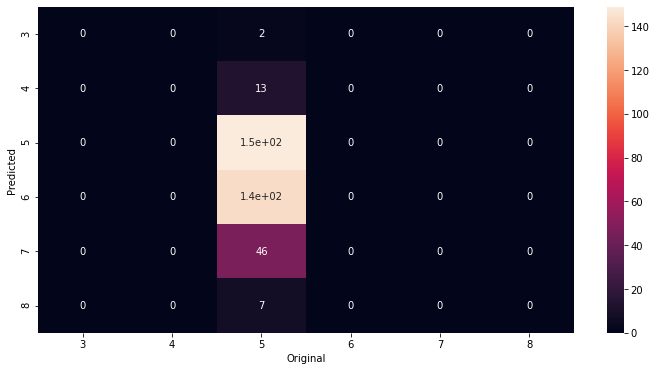

In [69]:
y_pred_cat_3=model_cat_3.predict(X_test)
print("The Accuracy of the model is : ",accuracy_score(y_test,convert_to_class_labels(y_pred_cat_3)))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,convert_to_class_labels(y_pred_cat_3)),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


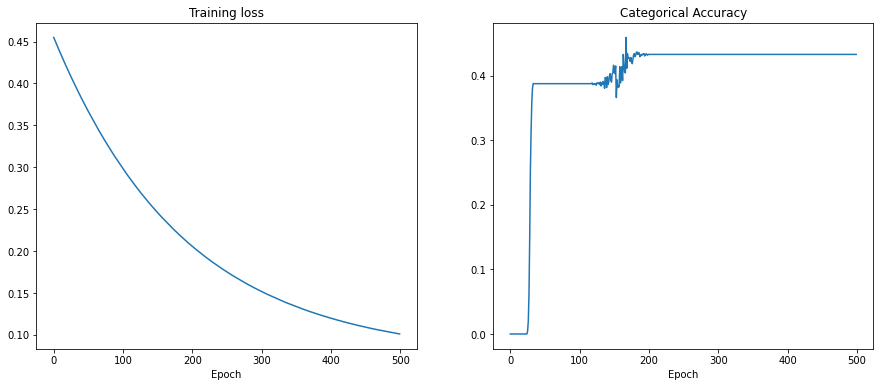

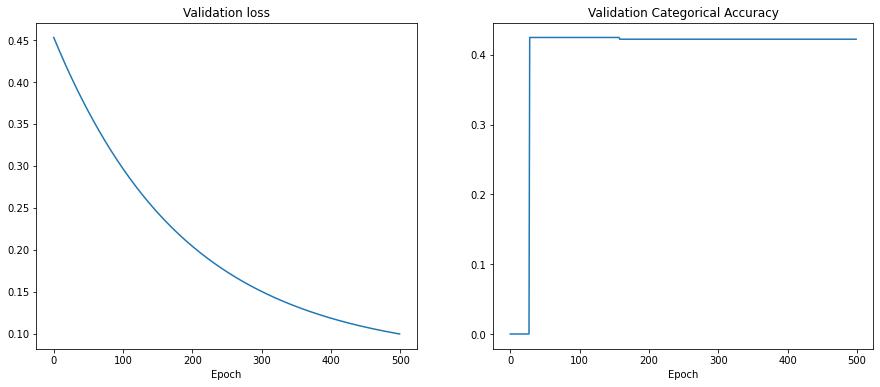

In [71]:
history=history_cat_3.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["categorical_accuracy"])
ax.set_title("Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()
#
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["val_loss"])
ax.set_title("Validation loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["val_categorical_accuracy"])
ax.set_title("Validation Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()

# Regression Neural Network - Trial 3

In [72]:
###################################################################
#Regressional Neural Network
###################################################################
model_reg_3=k.Sequential()
model_reg_3.add(BatchNormalization(input_shape=(X_train1.shape[1],)))
model_reg_3.add(Flatten())
model_reg_3.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_3.add(Dropout(0.2, input_shape=(50,)))
model_reg_3.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_3.add(Dropout(0.2, input_shape=(50,)))
model_reg_3.add(Dense(30,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_3.add(Dropout(0.5, input_shape=(50,)))
model_reg_3.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_3.add(Dropout(0.2, input_shape=(50,)))
model_reg_3.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_3.add(Dropout(0.5, input_shape=(30,)))
model_reg_3.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_3.add(Dense(1))
sgd = optimizers.SGD(lr = 0.01,momentum=0.6)
model_reg_3.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.MeanSquaredError())
###################################################################
#
###################################################################

t=time.time()
history_reg_3=model_reg_3.fit(X_train,y_train,validation_data = (X_valid.to_numpy(),y_valid),batch_size=100, epochs = 500) #add verbose later
print("Total Time Taken is : ",t-time.time())


Epoch 1/500
9/9 [==============================] - 1s 28ms/step - loss: 24.7251 - mean_squared_error: 24.6316 - val_loss: 1.3170 - val_mean_squared_error: 1.1956
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 0.9803 - mean_squared_error: 0.8532 - val_loss: 0.7402 - val_mean_squared_error: 0.6133
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7890 - mean_squared_error: 0.6625 - val_loss: 0.7417 - val_mean_squared_error: 0.6149
Epoch 4/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7863 - mean_squared_error: 0.6599 - val_loss: 0.7365 - val_mean_squared_error: 0.6112
Epoch 5/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7657 - mean_squared_error: 0.6405 - val_loss: 0.7365 - val_mean_squared_error: 0.6119
Epoch 6/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7863 - mean_squared_error: 0.6622 - val_loss: 0.7351 - val_mean_squared_error: 0.6115
Epoch 7/500
9/9 [==========================

9/9 [==============================] - 0s 7ms/step - loss: 0.7391 - mean_squared_error: 0.6513 - val_loss: 0.6985 - val_mean_squared_error: 0.6112
Epoch 53/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7085 - mean_squared_error: 0.6214 - val_loss: 0.6994 - val_mean_squared_error: 0.6124
Epoch 54/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7266 - mean_squared_error: 0.6397 - val_loss: 0.6980 - val_mean_squared_error: 0.6118
Epoch 55/500
9/9 [==============================] - 0s 8ms/step - loss: 0.7680 - mean_squared_error: 0.6818 - val_loss: 0.6979 - val_mean_squared_error: 0.6122
Epoch 56/500
9/9 [==============================] - 0s 8ms/step - loss: 0.7593 - mean_squared_error: 0.6737 - val_loss: 0.6963 - val_mean_squared_error: 0.6114
Epoch 57/500
9/9 [==============================] - 0s 8ms/step - loss: 0.7415 - mean_squared_error: 0.6567 - val_loss: 0.6955 - val_mean_squared_error: 0.6112
Epoch 58/500
9/9 [==============================] - 0

9/9 [==============================] - 0s 7ms/step - loss: 0.7344 - mean_squared_error: 0.6731 - val_loss: 0.6733 - val_mean_squared_error: 0.6120
Epoch 104/500
9/9 [==============================] - ETA: 0s - loss: 0.8084 - mean_squared_error: 0.74 - 0s 7ms/step - loss: 0.7280 - mean_squared_error: 0.6669 - val_loss: 0.6731 - val_mean_squared_error: 0.6122
Epoch 105/500
9/9 [==============================] - ETA: 0s - loss: 0.7864 - mean_squared_error: 0.72 - 0s 7ms/step - loss: 0.7267 - mean_squared_error: 0.6661 - val_loss: 0.6752 - val_mean_squared_error: 0.6145
Epoch 106/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7541 - mean_squared_error: 0.6935 - val_loss: 0.6724 - val_mean_squared_error: 0.6129
Epoch 107/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7121 - mean_squared_error: 0.6526 - val_loss: 0.6706 - val_mean_squared_error: 0.6112
Epoch 108/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6649 - mean_squared_error: 0.6

9/9 [==============================] - 0s 7ms/step - loss: 0.6568 - mean_squared_error: 0.6123 - val_loss: 0.6555 - val_mean_squared_error: 0.6112
Epoch 154/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7229 - mean_squared_error: 0.6786 - val_loss: 0.6560 - val_mean_squared_error: 0.6122
Epoch 155/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6848 - mean_squared_error: 0.6413 - val_loss: 0.6597 - val_mean_squared_error: 0.6155
Epoch 156/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7038 - mean_squared_error: 0.6598 - val_loss: 0.6549 - val_mean_squared_error: 0.6114
Epoch 157/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6977 - mean_squared_error: 0.6541 - val_loss: 0.6548 - val_mean_squared_error: 0.6115
Epoch 158/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7154 - mean_squared_error: 0.6720 - val_loss: 0.6543 - val_mean_squared_error: 0.6115
Epoch 159/500
9/9 [=============================

Epoch 204/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6671 - mean_squared_error: 0.6338 - val_loss: 0.6446 - val_mean_squared_error: 0.6115
Epoch 205/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6980 - mean_squared_error: 0.6650 - val_loss: 0.6445 - val_mean_squared_error: 0.6116
Epoch 206/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6959 - mean_squared_error: 0.6629 - val_loss: 0.6463 - val_mean_squared_error: 0.6141
Epoch 207/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6553 - mean_squared_error: 0.6233 - val_loss: 0.6513 - val_mean_squared_error: 0.6182
Epoch 208/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6691 - mean_squared_error: 0.6362 - val_loss: 0.6437 - val_mean_squared_error: 0.6113
Epoch 209/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6966 - mean_squared_error: 0.6642 - val_loss: 0.6433 - val_mean_squared_error: 0.6113
Epoch 210/500
9/9 [===============

Epoch 255/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6908 - mean_squared_error: 0.6654 - val_loss: 0.6374 - val_mean_squared_error: 0.6118
Epoch 256/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7028 - mean_squared_error: 0.6771 - val_loss: 0.6383 - val_mean_squared_error: 0.6134
Epoch 257/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6751 - mean_squared_error: 0.6499 - val_loss: 0.6368 - val_mean_squared_error: 0.6115
Epoch 258/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6667 - mean_squared_error: 0.6413 - val_loss: 0.6363 - val_mean_squared_error: 0.6112
Epoch 259/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6777 - mean_squared_error: 0.6527 - val_loss: 0.6371 - val_mean_squared_error: 0.6120
Epoch 260/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6722 - mean_squared_error: 0.6470 - val_loss: 0.6362 - val_mean_squared_error: 0.6114
Epoch 261/500
9/9 [===============

Epoch 306/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6506 - mean_squared_error: 0.6300 - val_loss: 0.6317 - val_mean_squared_error: 0.6115
Epoch 307/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6684 - mean_squared_error: 0.6481 - val_loss: 0.6314 - val_mean_squared_error: 0.6112
Epoch 308/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6479 - mean_squared_error: 0.6278 - val_loss: 0.6340 - val_mean_squared_error: 0.6136
Epoch 309/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6803 - mean_squared_error: 0.6599 - val_loss: 0.6313 - val_mean_squared_error: 0.6112
Epoch 310/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6834 - mean_squared_error: 0.6634 - val_loss: 0.6313 - val_mean_squared_error: 0.6113
Epoch 311/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6592 - mean_squared_error: 0.6392 - val_loss: 0.6312 - val_mean_squared_error: 0.6114
Epoch 312/500
9/9 [===============

Epoch 357/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6902 - mean_squared_error: 0.6732 - val_loss: 0.6286 - val_mean_squared_error: 0.6117
Epoch 358/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6763 - mean_squared_error: 0.6593 - val_loss: 0.6279 - val_mean_squared_error: 0.6112
Epoch 359/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7022 - mean_squared_error: 0.6853 - val_loss: 0.6280 - val_mean_squared_error: 0.6113
Epoch 360/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6619 - mean_squared_error: 0.6452 - val_loss: 0.6290 - val_mean_squared_error: 0.6122
Epoch 361/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6864 - mean_squared_error: 0.6696 - val_loss: 0.6287 - val_mean_squared_error: 0.6120
Epoch 362/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6849 - mean_squared_error: 0.6681 - val_loss: 0.6284 - val_mean_squared_error: 0.6117
Epoch 363/500
9/9 [===============

Epoch 408/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6235 - mean_squared_error: 0.6090 - val_loss: 0.6267 - val_mean_squared_error: 0.6123
Epoch 409/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6557 - mean_squared_error: 0.6411 - val_loss: 0.6288 - val_mean_squared_error: 0.6150
Epoch 410/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6697 - mean_squared_error: 0.6558 - val_loss: 0.6257 - val_mean_squared_error: 0.6114
Epoch 411/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6746 - mean_squared_error: 0.6603 - val_loss: 0.6263 - val_mean_squared_error: 0.6124
Epoch 412/500
9/9 [==============================] - 0s 6ms/step - loss: 0.7095 - mean_squared_error: 0.6954 - val_loss: 0.6253 - val_mean_squared_error: 0.6112
Epoch 413/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6465 - mean_squared_error: 0.6324 - val_loss: 0.6257 - val_mean_squared_error: 0.6118
Epoch 414/500
9/9 [===============

Epoch 459/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6824 - mean_squared_error: 0.6697 - val_loss: 0.6236 - val_mean_squared_error: 0.6112
Epoch 460/500
9/9 [==============================] - 0s 7ms/step - loss: 0.7159 - mean_squared_error: 0.7033 - val_loss: 0.6236 - val_mean_squared_error: 0.6112
Epoch 461/500
9/9 [==============================] - 0s 6ms/step - loss: 0.6614 - mean_squared_error: 0.6491 - val_loss: 0.6307 - val_mean_squared_error: 0.6179
Epoch 462/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6733 - mean_squared_error: 0.6605 - val_loss: 0.6235 - val_mean_squared_error: 0.6112
Epoch 463/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6488 - mean_squared_error: 0.6366 - val_loss: 0.6238 - val_mean_squared_error: 0.6114
Epoch 464/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6362 - mean_squared_error: 0.6238 - val_loss: 0.6239 - val_mean_squared_error: 0.6117
Epoch 465/500
9/9 [===============

The Accuracy of the model is :  0.41388888888888886


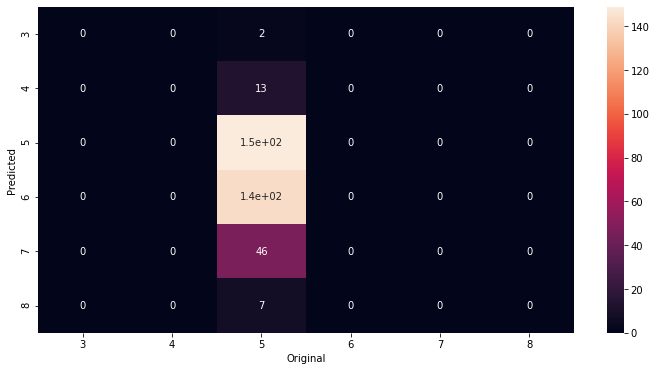

In [73]:
y_pred_reg_3=model_reg_3.predict(X_test).astype("int64")
print("The Accuracy of the model is : ",accuracy_score(y_test,y_pred_reg_3))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,y_pred_reg_3),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


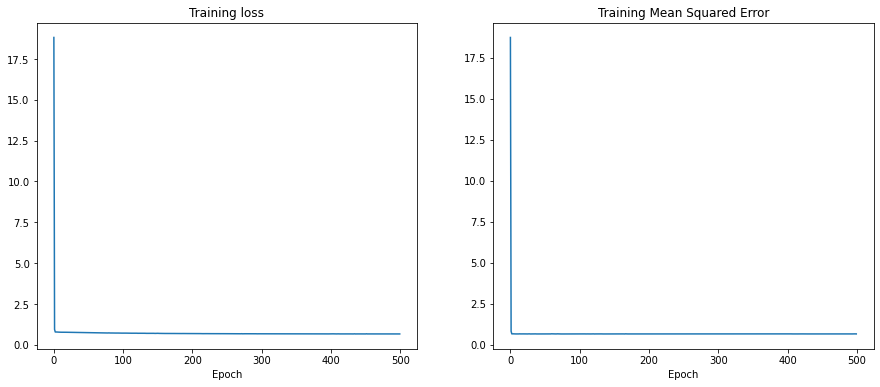

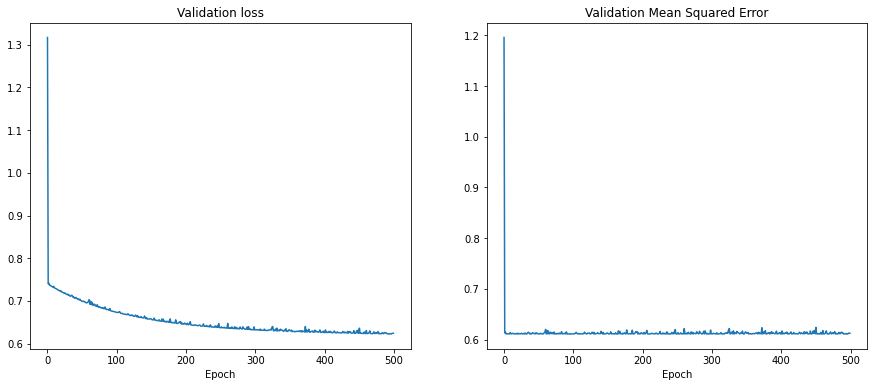

In [75]:
history=history_reg_3.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["mean_squared_error"])
ax.set_title("Training Mean Squared Error")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()
#
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["val_loss"])
ax.set_title("Validation loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["val_mean_squared_error"])
ax.set_title("Validation Mean Squared Error")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()

Obviously, doing some PCA is not helping at all. Number of itreations with possible changes have been done but they haven't been documented here. Some more testing for a sample has been taken below.

One glaring thing is that data is not at all sufficient we want to train our model because batch size of 50 and 100 epochs has already cleaned the dataset which contains just 1599 input points. Hence we need more data to hit that above 80 accuracy.

# Modifying some options and Testing

In [87]:
#Freshly reloading the data again
X_train1, X_valid, y_train1, y_valid = train_test_split(data, data_org["Signal_Strength"], random_state=0)

In [91]:
###################################################################
#Categorical Neural Network
###################################################################
model_cat_1_test=k.Sequential()
#model_cat_1_test.add(Flatten(input_shape=(X_train.shape[1],)))
#model_cat_1_test.add(Reshape((784,),input_shape=(X_train.shape[0],X_train.shape[1],)))
model_cat_1_test.add(BatchNormalization())
model_cat_1_test.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1_test.add(Dropout(0.2, input_shape=(60,)))
model_cat_1_test.add(Dense(30,activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1_test.add(Dropout(0.2, input_shape=(30,)))
#model_cat_1_test.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1_test.add(Dropout(0.4, input_shape=(60,)))
#model_cat_1_test.add(Dense(60,activation="relu",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1_test.add(Dropout(0.2, input_shape=(60,)))
model_cat_1_test.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1_test.add(Dropout(0.4, input_shape=(60,)))
model_cat_1_test.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1_test.add(Dropout(0.2, input_shape=(30,)))
model_cat_1_test.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1_test.add(Dropout(0.2, input_shape=(30,)))
model_cat_1_test.add(Dense(15,activation="sigmoid",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1_test.add(Dense(9,activation="softmax"))
sgd = optimizers.SGD(lr = 0.01,momentum=0.3)
model_cat_1_test.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.CategoricalAccuracy())

t=time.time()
###################################################################
#
###################################################################
history_cat_1_test=model_cat_1_test.fit(X_train1,k.utils.to_categorical(y_train1),batch_size=50, epochs = 1000, verbose = 1)
print("Total Time Taken is : ",t-time.time())

Epoch 1/1000
24/24 [==============================] - 1s 4ms/step - loss: 0.2668 - categorical_accuracy: 0.4121
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2643 - categorical_accuracy: 0.4011
Epoch 3/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2611 - categorical_accuracy: 0.4280
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.2582 - categorical_accuracy: 0.4399
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2555 - categorical_accuracy: 0.4448
Epoch 6/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2527 - categorical_accuracy: 0.4527
Epoch 7/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2510 - categorical_accuracy: 0.4270
Epoch 8/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2485 - categorical_accuracy: 0.4252
Epoch 9/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2461 - categorical_accuracy:

24/24 [==============================] - 0s 3ms/step - loss: 0.1445 - categorical_accuracy: 0.4175
Epoch 74/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.1425 - categorical_accuracy: 0.4389
Epoch 75/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.1418 - categorical_accuracy: 0.4379
Epoch 76/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.1409 - categorical_accuracy: 0.4342
Epoch 77/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.1402 - categorical_accuracy: 0.4207
Epoch 78/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.1390 - categorical_accuracy: 0.4317
Epoch 79/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.1388 - categorical_accuracy: 0.4153
Epoch 80/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.1375 - categorical_accuracy: 0.4293
Epoch 81/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.1367 - categorical_accuracy: 0.42

24/24 [==============================] - 0s 3ms/step - loss: 0.0981 - categorical_accuracy: 0.4409
Epoch 146/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0982 - categorical_accuracy: 0.4554
Epoch 147/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0984 - categorical_accuracy: 0.4186
Epoch 148/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0978 - categorical_accuracy: 0.4071
Epoch 149/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0977 - categorical_accuracy: 0.4325
Epoch 150/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0981 - categorical_accuracy: 0.4167
Epoch 151/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0970 - categorical_accuracy: 0.4347
Epoch 152/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0963 - categorical_accuracy: 0.4191
Epoch 153/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0956 - categorical_accura

Epoch 217/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0823 - categorical_accuracy: 0.4262
Epoch 218/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0821 - categorical_accuracy: 0.4201
Epoch 219/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0832 - categorical_accuracy: 0.4163
Epoch 220/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0827 - categorical_accuracy: 0.4106
Epoch 221/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0821 - categorical_accuracy: 0.4236
Epoch 222/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0819 - categorical_accuracy: 0.4326
Epoch 223/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0817 - categorical_accuracy: 0.4296
Epoch 224/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0817 - categorical_accuracy: 0.4254
Epoch 225/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0818 - cat

24/24 [==============================] - 0s 3ms/step - loss: 0.0763 - categorical_accuracy: 0.4239
Epoch 289/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0772 - categorical_accuracy: 0.4296
Epoch 290/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0762 - categorical_accuracy: 0.4385
Epoch 291/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0767 - categorical_accuracy: 0.4305
Epoch 292/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0787 - categorical_accuracy: 0.4194
Epoch 293/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0759 - categorical_accuracy: 0.4371
Epoch 294/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0759 - categorical_accuracy: 0.4442
Epoch 295/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0766 - categorical_accuracy: 0.4068
Epoch 296/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0769 - categorical_accura

Epoch 360/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0750 - categorical_accuracy: 0.4268
Epoch 361/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0745 - categorical_accuracy: 0.4427
Epoch 362/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0738 - categorical_accuracy: 0.4195
Epoch 363/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0741 - categorical_accuracy: 0.4154
Epoch 364/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0735 - categorical_accuracy: 0.4403
Epoch 365/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0740 - categorical_accuracy: 0.4272
Epoch 366/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0743 - categorical_accuracy: 0.4265
Epoch 367/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0745 - categorical_accuracy: 0.4345
Epoch 368/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0736 - cat

24/24 [==============================] - 0s 3ms/step - loss: 0.0720 - categorical_accuracy: 0.4343
Epoch 432/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0731 - categorical_accuracy: 0.4131
Epoch 433/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0745 - categorical_accuracy: 0.4238
Epoch 434/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0732 - categorical_accuracy: 0.4415
Epoch 435/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0740 - categorical_accuracy: 0.4293
Epoch 436/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0735 - categorical_accuracy: 0.4033
Epoch 437/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0734 - categorical_accuracy: 0.4472
Epoch 438/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0735 - categorical_accuracy: 0.4330
Epoch 439/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0739 - categorical_accura

Epoch 503/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0724 - categorical_accuracy: 0.4329
Epoch 504/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0718 - categorical_accuracy: 0.4311
Epoch 505/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0718 - categorical_accuracy: 0.4146
Epoch 506/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0724 - categorical_accuracy: 0.4204
Epoch 507/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0728 - categorical_accuracy: 0.4217
Epoch 508/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0721 - categorical_accuracy: 0.4228
Epoch 509/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0720 - categorical_accuracy: 0.4313
Epoch 510/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0730 - categorical_accuracy: 0.4150
Epoch 511/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0718 - cat

24/24 [==============================] - 0s 3ms/step - loss: 0.0723 - categorical_accuracy: 0.4430
Epoch 575/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0727 - categorical_accuracy: 0.4289
Epoch 576/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0732 - categorical_accuracy: 0.4061
Epoch 577/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0721 - categorical_accuracy: 0.4345
Epoch 578/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0717 - categorical_accuracy: 0.4301
Epoch 579/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0723 - categorical_accuracy: 0.4441
Epoch 580/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0723 - categorical_accuracy: 0.4365
Epoch 581/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0735 - categorical_accuracy: 0.4113
Epoch 582/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0729 - categorical_accura

Epoch 646/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0733 - categorical_accuracy: 0.4169
Epoch 647/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0734 - categorical_accuracy: 0.4046
Epoch 648/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0732 - categorical_accuracy: 0.4251
Epoch 649/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0726 - categorical_accuracy: 0.4403
Epoch 650/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0724 - categorical_accuracy: 0.4131
Epoch 651/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0716 - categorical_accuracy: 0.4610
Epoch 652/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0720 - categorical_accuracy: 0.4420
Epoch 653/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0714 - categorical_accuracy: 0.4547
Epoch 654/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0727 - cat

24/24 [==============================] - 0s 3ms/step - loss: 0.0727 - categorical_accuracy: 0.4139
Epoch 718/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0735 - categorical_accuracy: 0.4085
Epoch 719/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0724 - categorical_accuracy: 0.4129
Epoch 720/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0721 - categorical_accuracy: 0.4332
Epoch 721/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0721 - categorical_accuracy: 0.4439
Epoch 722/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0728 - categorical_accuracy: 0.4010
Epoch 723/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0723 - categorical_accuracy: 0.4278
Epoch 724/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0730 - categorical_accuracy: 0.4212
Epoch 725/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0718 - categorical_accura

Epoch 789/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0733 - categorical_accuracy: 0.4039
Epoch 790/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0728 - categorical_accuracy: 0.4223
Epoch 791/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0722 - categorical_accuracy: 0.4403
Epoch 792/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0726 - categorical_accuracy: 0.4111
Epoch 793/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0729 - categorical_accuracy: 0.4318
Epoch 794/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0716 - categorical_accuracy: 0.4473
Epoch 795/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0732 - categorical_accuracy: 0.4127
Epoch 796/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0728 - categorical_accuracy: 0.4270
Epoch 797/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0720 - cat

24/24 [==============================] - 0s 3ms/step - loss: 0.0715 - categorical_accuracy: 0.4309
Epoch 861/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0725 - categorical_accuracy: 0.4188
Epoch 862/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0716 - categorical_accuracy: 0.4625
Epoch 863/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0713 - categorical_accuracy: 0.4492
Epoch 864/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0720 - categorical_accuracy: 0.4193
Epoch 865/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0714 - categorical_accuracy: 0.4468
Epoch 866/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0729 - categorical_accuracy: 0.4245
Epoch 867/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0727 - categorical_accuracy: 0.4179
Epoch 868/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0725 - categorical_accura

Epoch 932/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0712 - categorical_accuracy: 0.4258
Epoch 933/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0722 - categorical_accuracy: 0.4413
Epoch 934/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0719 - categorical_accuracy: 0.4152
Epoch 935/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0718 - categorical_accuracy: 0.4472
Epoch 936/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0711 - categorical_accuracy: 0.4367
Epoch 937/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0722 - categorical_accuracy: 0.4390
Epoch 938/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0723 - categorical_accuracy: 0.4265
Epoch 939/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0718 - categorical_accuracy: 0.4216
Epoch 940/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0721 - cat

dict_keys(['loss', 'categorical_accuracy'])


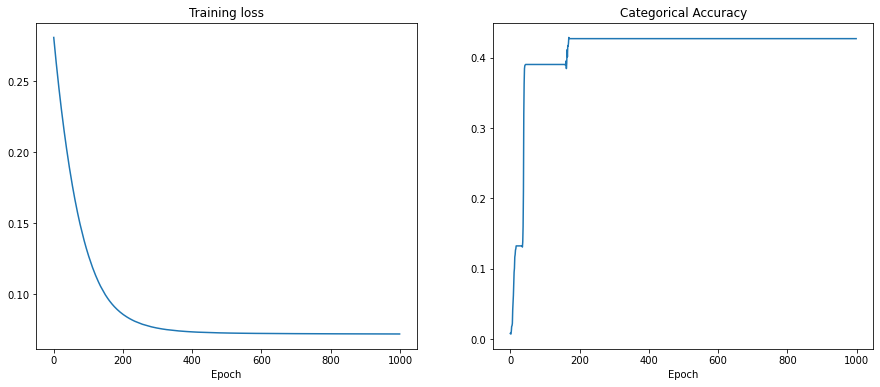

In [82]:
history=history_cat_1_test.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["categorical_accuracy"])
ax.set_title("Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()


Here we have decreased the batch size and increased the number of epochs, but still we couldn't hit a peak accuracy of greater than 0.45. Let us try the same with regression model where we got initial accuracy above 50.

In [88]:
###################################################################
#Regressional Neural Network
###################################################################
model_reg_1_test=k.Sequential()
model_reg_1_test.add(BatchNormalization(input_shape=(X_train1.shape[1],)))
model_reg_1_test.add(Flatten())
model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1_test.add(Dropout(0.2, input_shape=(50,)))
model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1_test.add(Dropout(0.2, input_shape=(50,)))
model_reg_1_test.add(Dense(30,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_reg_1_test.add(Dropout(0.5, input_shape=(50,)))
#model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_reg_1_test.add(Dropout(0.2, input_shape=(50,)))
#model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1_test.add(Dropout(0.5, input_shape=(30,)))
model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1_test.add(Dense(1))
sgd = optimizers.SGD(lr = 0.01,momentum=0.6)
model_reg_1_test.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.MeanSquaredError())
###################################################################
#
###################################################################

t=time.time()
history_reg_1_test=model_reg_1_test.fit(X_train1,y_train1,batch_size=50, epochs = 1000) #add verbose later
print("Total Time Taken is : ",t-time.time())

Epoch 1/1000
24/24 [==============================] - 1s 2ms/step - loss: 16.7935 - mean_squared_error: 16.7319
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.8037 - mean_squared_error: 0.7194
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7469 - mean_squared_error: 0.6644
Epoch 4/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7865 - mean_squared_error: 0.7051
Epoch 5/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7520 - mean_squared_error: 0.6722
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7362 - mean_squared_error: 0.6582
Epoch 7/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.7455 - mean_squared_error: 0.6691
Epoch 8/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.7520 - mean_squared_error: 0.6763
Epoch 9/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7089 - mean_squared_error: 0.6350
Epoch 10

24/24 [==============================] - 0s 2ms/step - loss: 0.3655 - mean_squared_error: 0.3153
Epoch 75/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3419 - mean_squared_error: 0.2913
Epoch 76/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3536 - mean_squared_error: 0.3032
Epoch 77/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3512 - mean_squared_error: 0.3011
Epoch 78/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3395 - mean_squared_error: 0.2894
Epoch 79/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3593 - mean_squared_error: 0.3092
Epoch 80/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3173 - mean_squared_error: 0.2678
Epoch 81/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3299 - mean_squared_error: 0.2802
Epoch 82/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3651 - mean_squared_error: 0.3160
Epoch 83/1000
2

24/24 [==============================] - 0s 3ms/step - loss: 0.3201 - mean_squared_error: 0.2723
Epoch 148/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2963 - mean_squared_error: 0.2490
Epoch 149/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3453 - mean_squared_error: 0.2980
Epoch 150/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3272 - mean_squared_error: 0.2800
Epoch 151/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3040 - mean_squared_error: 0.2569
Epoch 152/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3053 - mean_squared_error: 0.2580
Epoch 153/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3526 - mean_squared_error: 0.3055
Epoch 154/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3010 - mean_squared_error: 0.2537
Epoch 155/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2740 - mean_squared_error: 0.2266
Epoch 1

24/24 [==============================] - 0s 2ms/step - loss: 0.3024 - mean_squared_error: 0.2571
Epoch 221/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2904 - mean_squared_error: 0.2451
Epoch 222/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2819 - mean_squared_error: 0.2366
Epoch 223/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2986 - mean_squared_error: 0.2537
Epoch 224/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3086 - mean_squared_error: 0.2636
Epoch 225/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2950 - mean_squared_error: 0.2497
Epoch 226/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3162 - mean_squared_error: 0.2716
Epoch 227/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3088 - mean_squared_error: 0.2641
Epoch 228/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3591 - mean_squared_error: 0.3140
Epoch 2

24/24 [==============================] - 0s 2ms/step - loss: 0.3005 - mean_squared_error: 0.2569
Epoch 294/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2806 - mean_squared_error: 0.2370
Epoch 295/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3090 - mean_squared_error: 0.2656
Epoch 296/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3121 - mean_squared_error: 0.2682
Epoch 297/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2808 - mean_squared_error: 0.2369
Epoch 298/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2912 - mean_squared_error: 0.2477
Epoch 299/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2888 - mean_squared_error: 0.2453
Epoch 300/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3124 - mean_squared_error: 0.2688
Epoch 301/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2816 - mean_squared_error: 0.2383
Epoch 3

24/24 [==============================] - 0s 2ms/step - loss: 0.2897 - mean_squared_error: 0.2468
Epoch 367/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2738 - mean_squared_error: 0.2312
Epoch 368/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2934 - mean_squared_error: 0.2507
Epoch 369/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2960 - mean_squared_error: 0.2531
Epoch 370/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2852 - mean_squared_error: 0.2424
Epoch 371/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2879 - mean_squared_error: 0.2455
Epoch 372/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2899 - mean_squared_error: 0.2469
Epoch 373/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3303 - mean_squared_error: 0.2877
Epoch 374/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3143 - mean_squared_error: 0.2715
Epoch 3

24/24 [==============================] - 0s 2ms/step - loss: 0.3020 - mean_squared_error: 0.2596
Epoch 440/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2925 - mean_squared_error: 0.2505
Epoch 441/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3005 - mean_squared_error: 0.2586
Epoch 442/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2880 - mean_squared_error: 0.2459
Epoch 443/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2979 - mean_squared_error: 0.2562
Epoch 444/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2810 - mean_squared_error: 0.2390
Epoch 445/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3054 - mean_squared_error: 0.2637
Epoch 446/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2634 - mean_squared_error: 0.2216
Epoch 447/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2941 - mean_squared_error: 0.2524
Epoch 4

24/24 [==============================] - 0s 2ms/step - loss: 0.2977 - mean_squared_error: 0.2565
Epoch 512/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2648 - mean_squared_error: 0.2239
Epoch 513/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3021 - mean_squared_error: 0.2608
Epoch 514/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2778 - mean_squared_error: 0.2369
Epoch 515/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2977 - mean_squared_error: 0.2570
Epoch 516/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2775 - mean_squared_error: 0.2368
Epoch 517/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2963 - mean_squared_error: 0.2551
Epoch 518/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2985 - mean_squared_error: 0.2578
Epoch 519/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3047 - mean_squared_error: 0.2634
Epoch 5

24/24 [==============================] - 0s 2ms/step - loss: 0.3051 - mean_squared_error: 0.2641
Epoch 585/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2668 - mean_squared_error: 0.2265
Epoch 586/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2814 - mean_squared_error: 0.2408
Epoch 587/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2952 - mean_squared_error: 0.2549
Epoch 588/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2855 - mean_squared_error: 0.2453
Epoch 589/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2868 - mean_squared_error: 0.2466
Epoch 590/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3023 - mean_squared_error: 0.2621
Epoch 591/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2708 - mean_squared_error: 0.2307
Epoch 592/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2869 - mean_squared_error: 0.2467
Epoch 5

24/24 [==============================] - 0s 2ms/step - loss: 0.2758 - mean_squared_error: 0.2357
Epoch 658/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2835 - mean_squared_error: 0.2431
Epoch 659/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2714 - mean_squared_error: 0.2311
Epoch 660/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2947 - mean_squared_error: 0.2544
Epoch 661/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2976 - mean_squared_error: 0.2572
Epoch 662/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2867 - mean_squared_error: 0.2461
Epoch 663/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2760 - mean_squared_error: 0.2357
Epoch 664/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2944 - mean_squared_error: 0.2540
Epoch 665/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2765 - mean_squared_error: 0.2365
Epoch 6

24/24 [==============================] - 0s 2ms/step - loss: 0.2896 - mean_squared_error: 0.2505
Epoch 731/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2993 - mean_squared_error: 0.2599
Epoch 732/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2761 - mean_squared_error: 0.2366
Epoch 733/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3090 - mean_squared_error: 0.2699
Epoch 734/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2802 - mean_squared_error: 0.2414
Epoch 735/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3254 - mean_squared_error: 0.2860
Epoch 736/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2830 - mean_squared_error: 0.2441
Epoch 737/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2824 - mean_squared_error: 0.2431
Epoch 738/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2841 - mean_squared_error: 0.2445
Epoch 7

24/24 [==============================] - 0s 2ms/step - loss: 0.3092 - mean_squared_error: 0.2703
Epoch 804/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2699 - mean_squared_error: 0.2309
Epoch 805/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2791 - mean_squared_error: 0.2403
Epoch 806/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2909 - mean_squared_error: 0.2521
Epoch 807/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3143 - mean_squared_error: 0.2754
Epoch 808/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2673 - mean_squared_error: 0.2284
Epoch 809/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2747 - mean_squared_error: 0.2360
Epoch 810/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2987 - mean_squared_error: 0.2596
Epoch 811/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2870 - mean_squared_error: 0.2481
Epoch 8

24/24 [==============================] - 0s 2ms/step - loss: 0.2888 - mean_squared_error: 0.2498
Epoch 877/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2870 - mean_squared_error: 0.2477
Epoch 878/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2882 - mean_squared_error: 0.2493
Epoch 879/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.2758 - mean_squared_error: 0.2366
Epoch 880/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3017 - mean_squared_error: 0.2627
Epoch 881/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3060 - mean_squared_error: 0.2668
Epoch 882/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3020 - mean_squared_error: 0.2631
Epoch 883/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2937 - mean_squared_error: 0.2547
Epoch 884/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2920 - mean_squared_error: 0.2531
Epoch 8

24/24 [==============================] - 0s 2ms/step - loss: 0.2794 - mean_squared_error: 0.2412
Epoch 950/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3081 - mean_squared_error: 0.2702
Epoch 951/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3120 - mean_squared_error: 0.2740
Epoch 952/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3012 - mean_squared_error: 0.2632
Epoch 953/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2682 - mean_squared_error: 0.2302
Epoch 954/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2689 - mean_squared_error: 0.2310
Epoch 955/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2925 - mean_squared_error: 0.2545
Epoch 956/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2789 - mean_squared_error: 0.2411
Epoch 957/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2662 - mean_squared_error: 0.2282
Epoch 9

The Accuracy of the model is :  0.5025


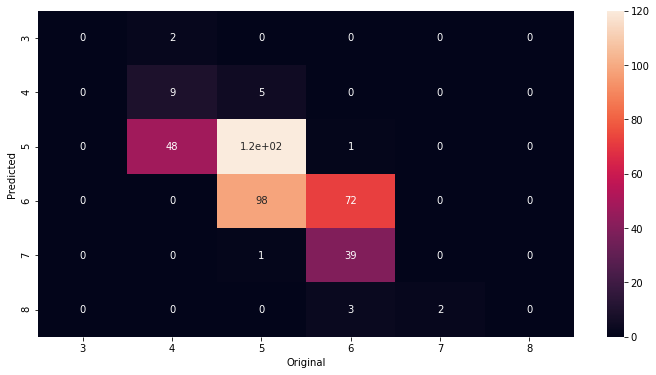

In [89]:
y_pred_reg_1_test=model_reg_1_test.predict(X_valid).astype("int64")
###########################################################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("The Accuracy of the model is : ",accuracy_score(y_valid,y_pred_reg_1_test))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_valid,y_pred_reg_1_test),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'mean_squared_error'])


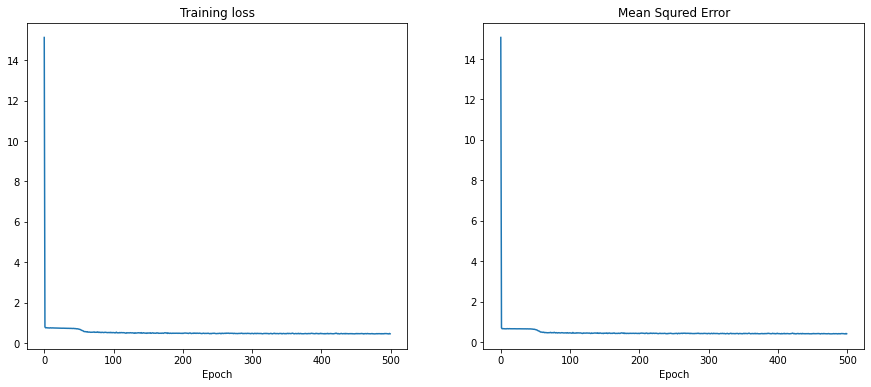

In [90]:
history=history_reg_1.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["mean_squared_error"])
ax.set_title("Mean Squred Error")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()